In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 문제 1. 
 - 필요한 라이브러리를 로드하고 시각화에서 디스플레이를 선명하게 표시되도록 하고, 한글 폰트가 나오도록 설정하고 확인한다. 한글깨짐 여부를 그래프로 test

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# seaborn style 
sns.set(style='white', rc={'figure.figsize': (15,3)})


plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')



Text(0, 0.5, 'y축')

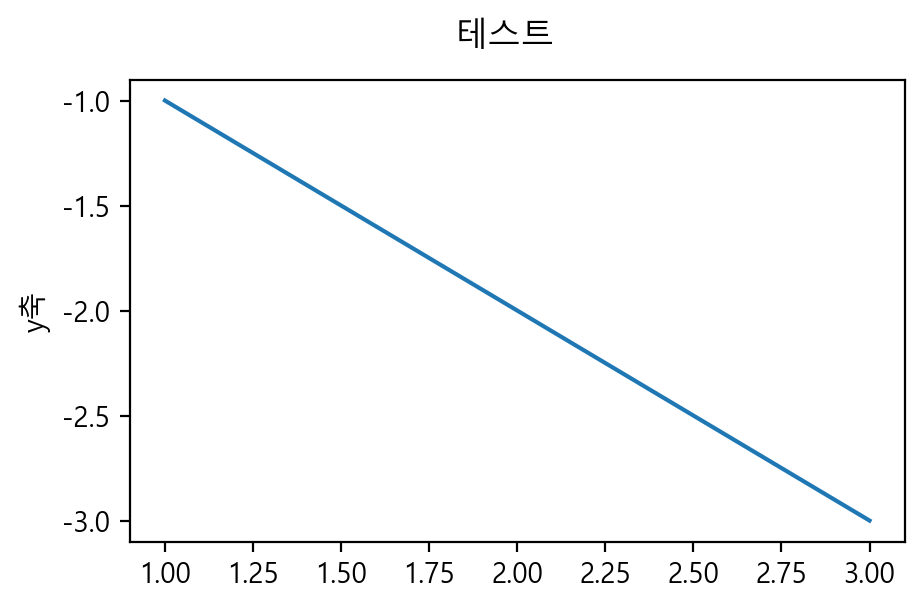

In [9]:
# test
x=[1,2,3]
y=[-1,-2,-3]
plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.suptitle('테스트') ; plt.ylabel('y축')

# 문제 2.
- https://www.data.go.kr에서 “상가(상권)정보”를 다운 받아, 서울과 부산데이터만 df 변수에 읽어들인다.

In [10]:
#서울 데이터
df_seoul = pd.read_csv(r'C:\ai_x\download\shareData\상가정보_20250331\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                      #encoding='utf-8',
                      #sep=',',
                      #low_memory=False,  # 용량이 큰경우 사용
                      )
df_seoul.shape 

(540517, 39)

In [11]:
# 부산 데이터
df_busan = pd.read_csv(r'C:\ai_x\download\shareData\상가정보_20250331\소상공인시장진흥공단_상가(상권)정보_부산_202503.csv')
df_busan.shape

(155537, 39)

In [12]:
df_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [13]:
df_busan.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
df_seoul.columns == df_busan.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [16]:
df = pd.concat( [df_seoul, df_busan])
df.shape, 540517+155537

((696054, 39), 696054)

In [18]:
df.reset_index(drop=True, inplace=True)
df.loc[0, ['상호명']], df.index

(상호명    부동산임대김은숙
 Name: 0, dtype: object,
 RangeIndex(start=0, stop=696054, step=1))

In [19]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량
# pip install memory_profiler
!pip install memory_profiler

In [23]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 804.50 MiB, increment: 0.01 MiB


In [22]:
del df_seoul, df_busan

# 문제 3. 데이터 셋의 결측치 확인 및 시각화
- missingno 라이브러리 https://github.com/ResidentMario/missingno
- matplotlib
```

    ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.
    ② df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.
    ③ 결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)  
    ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).
```
## (0) missingno 라이브러리로 결측치 시각화

In [32]:
!pip install missingno

<Axes: >

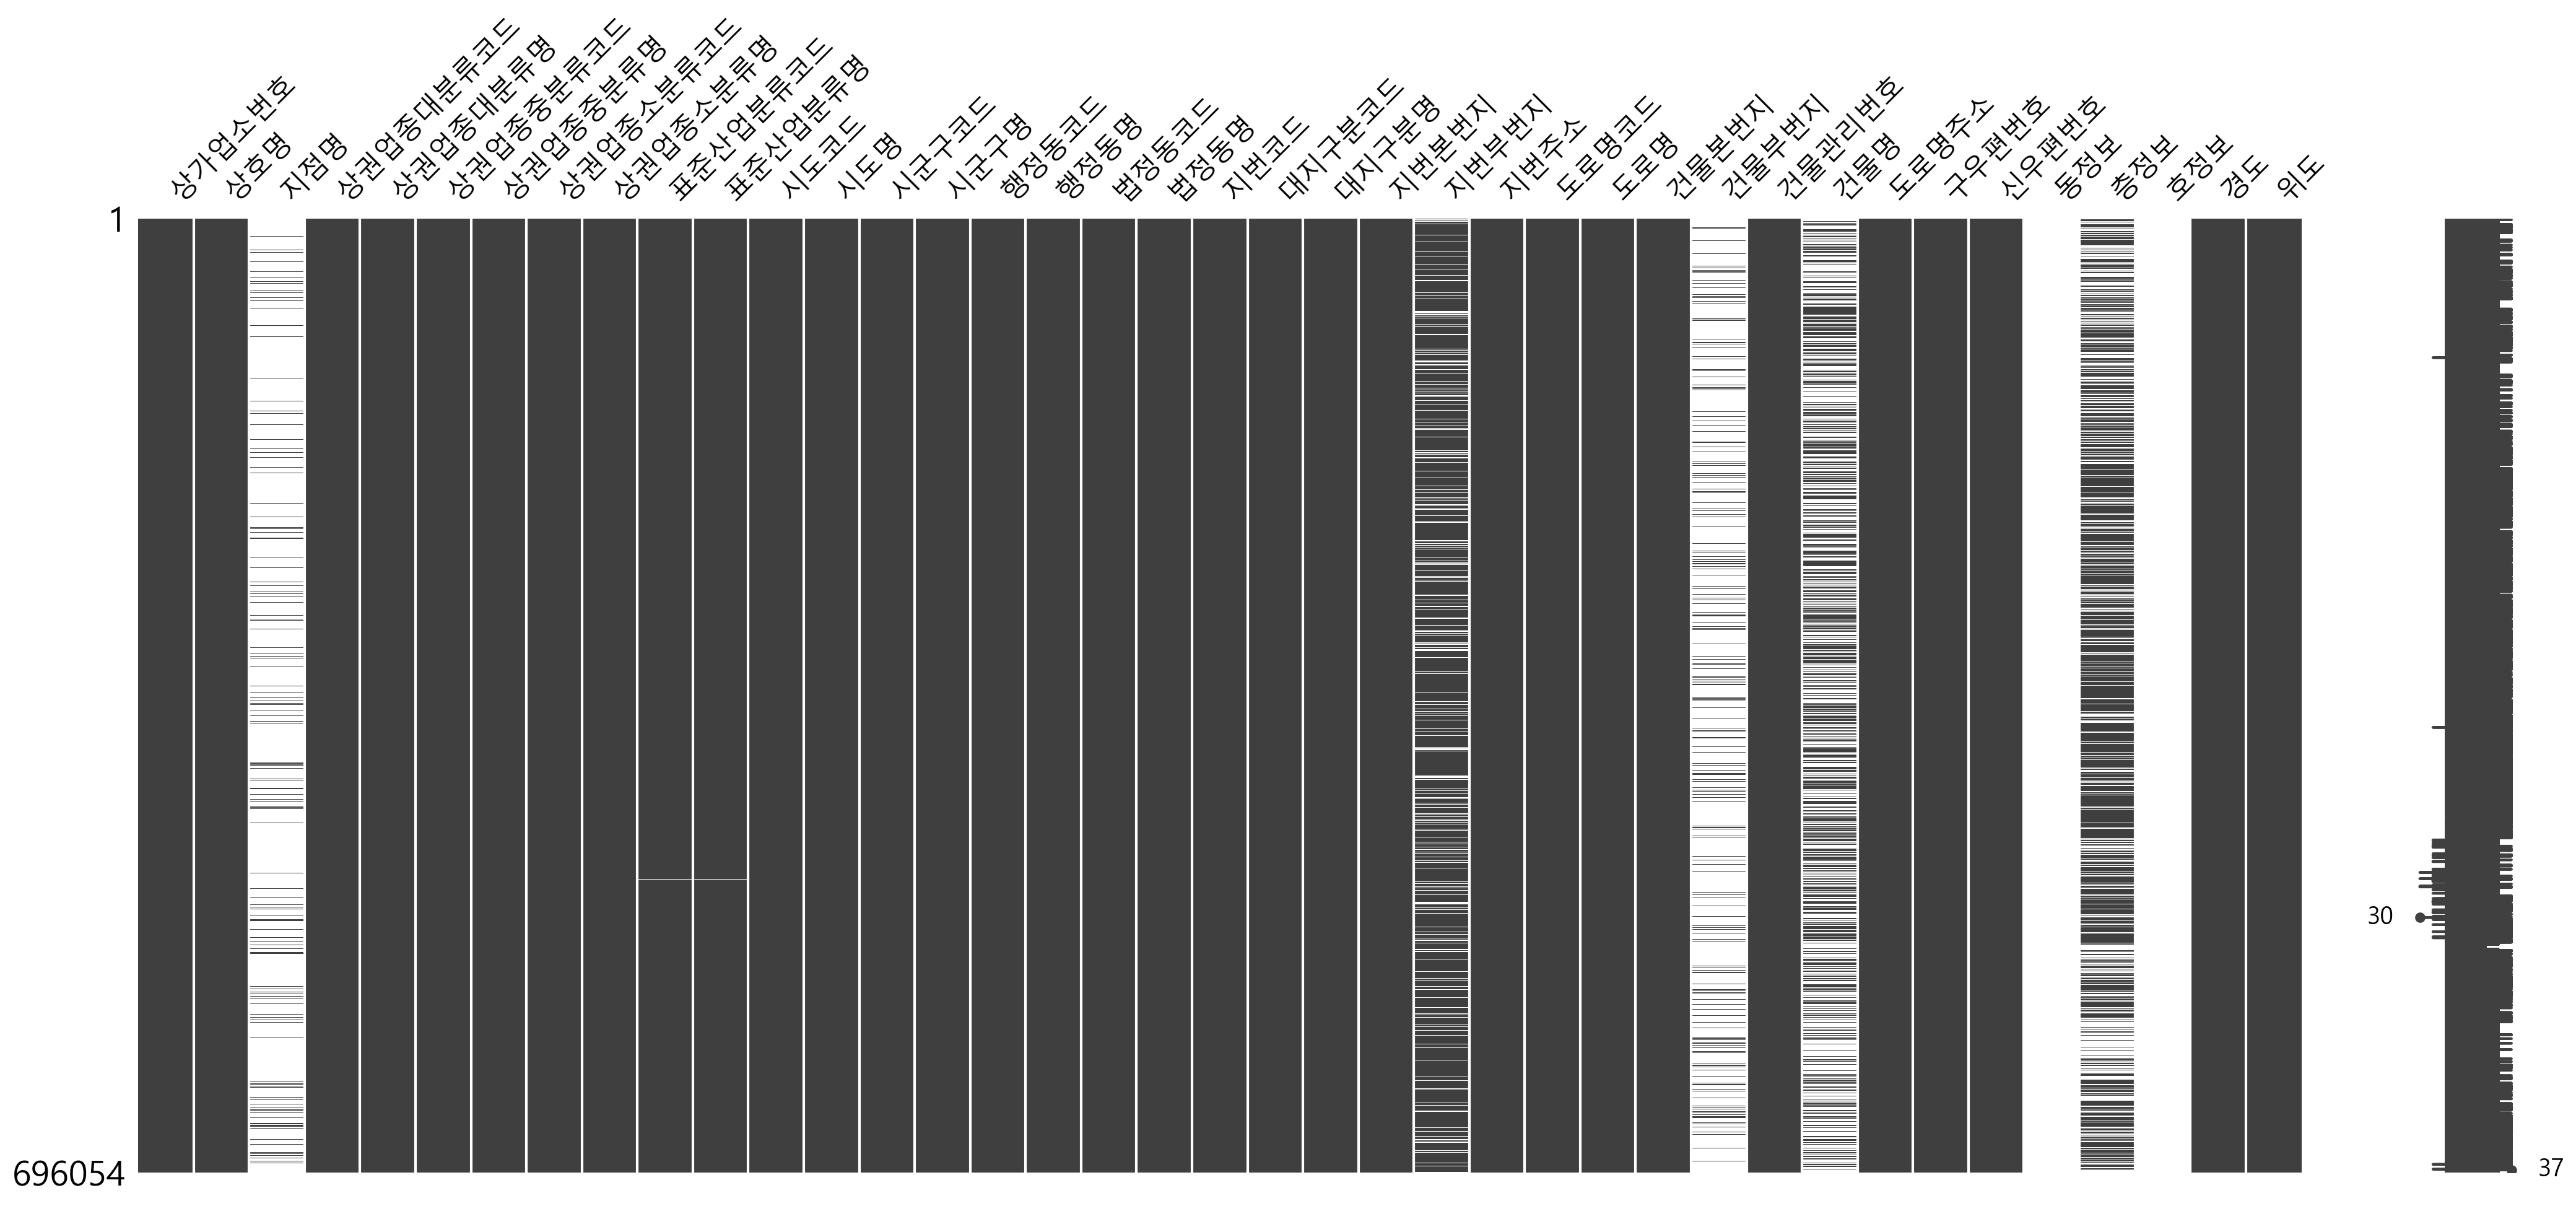

In [31]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

<Axes: >

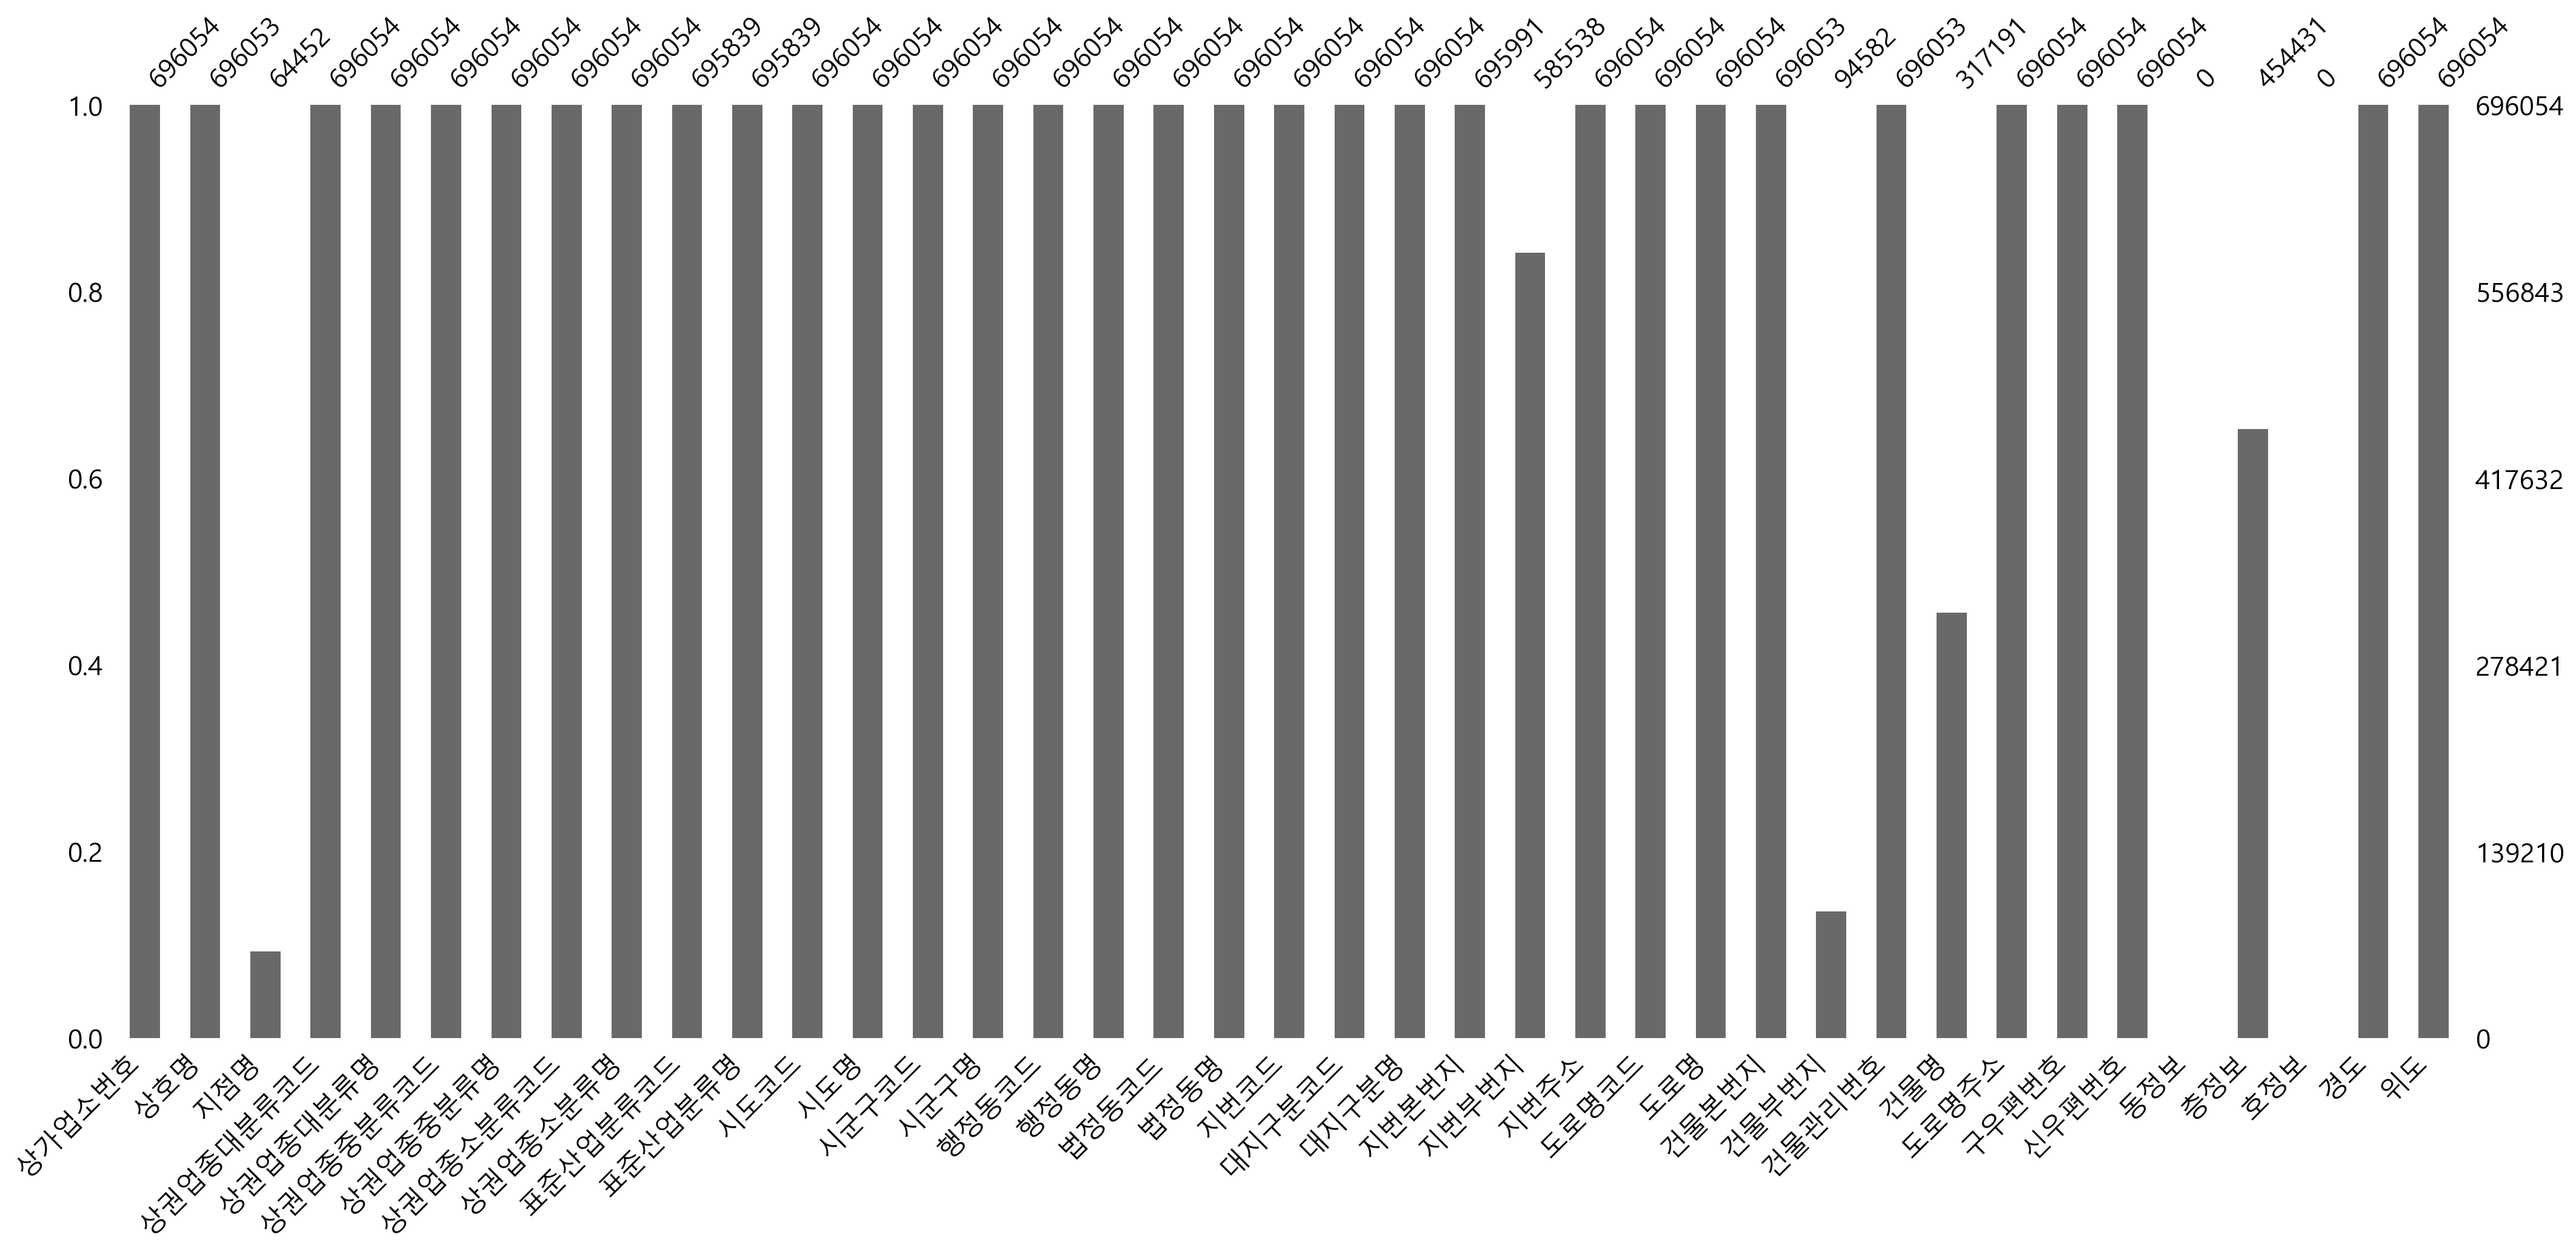

In [33]:
msno.bar(df)

<Axes: >

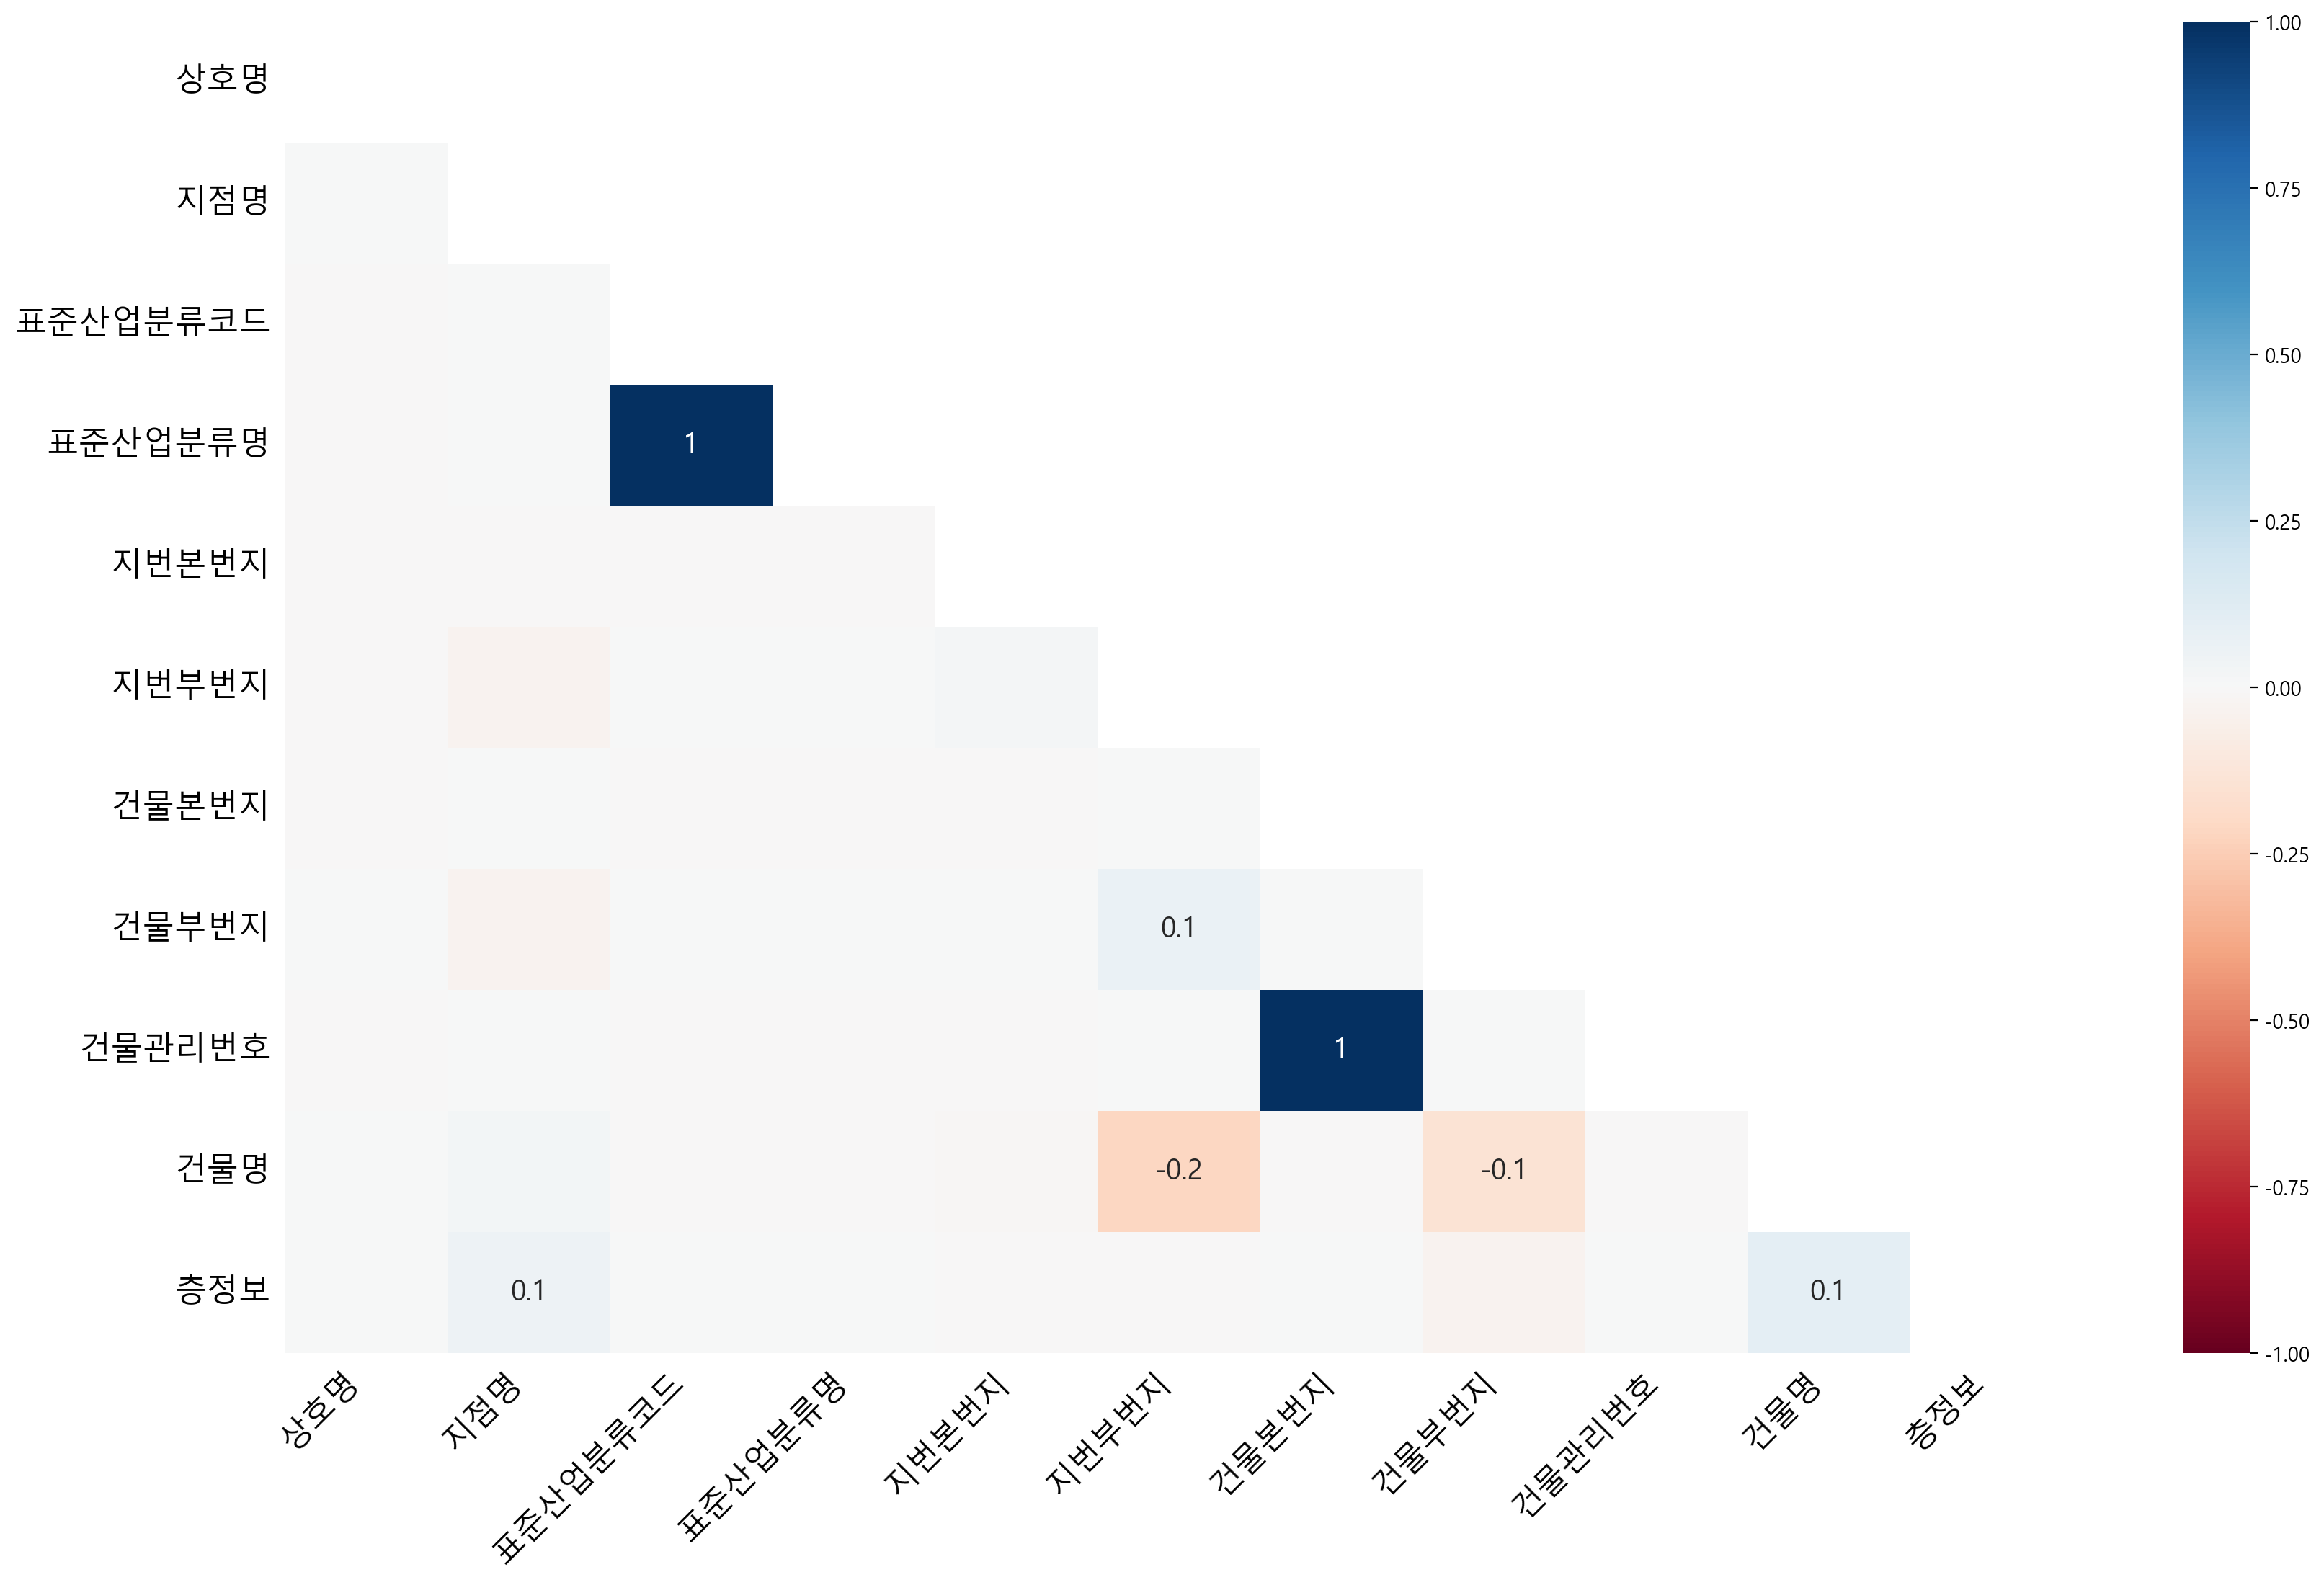

In [34]:
msno.heatmap(df)

<Axes: >

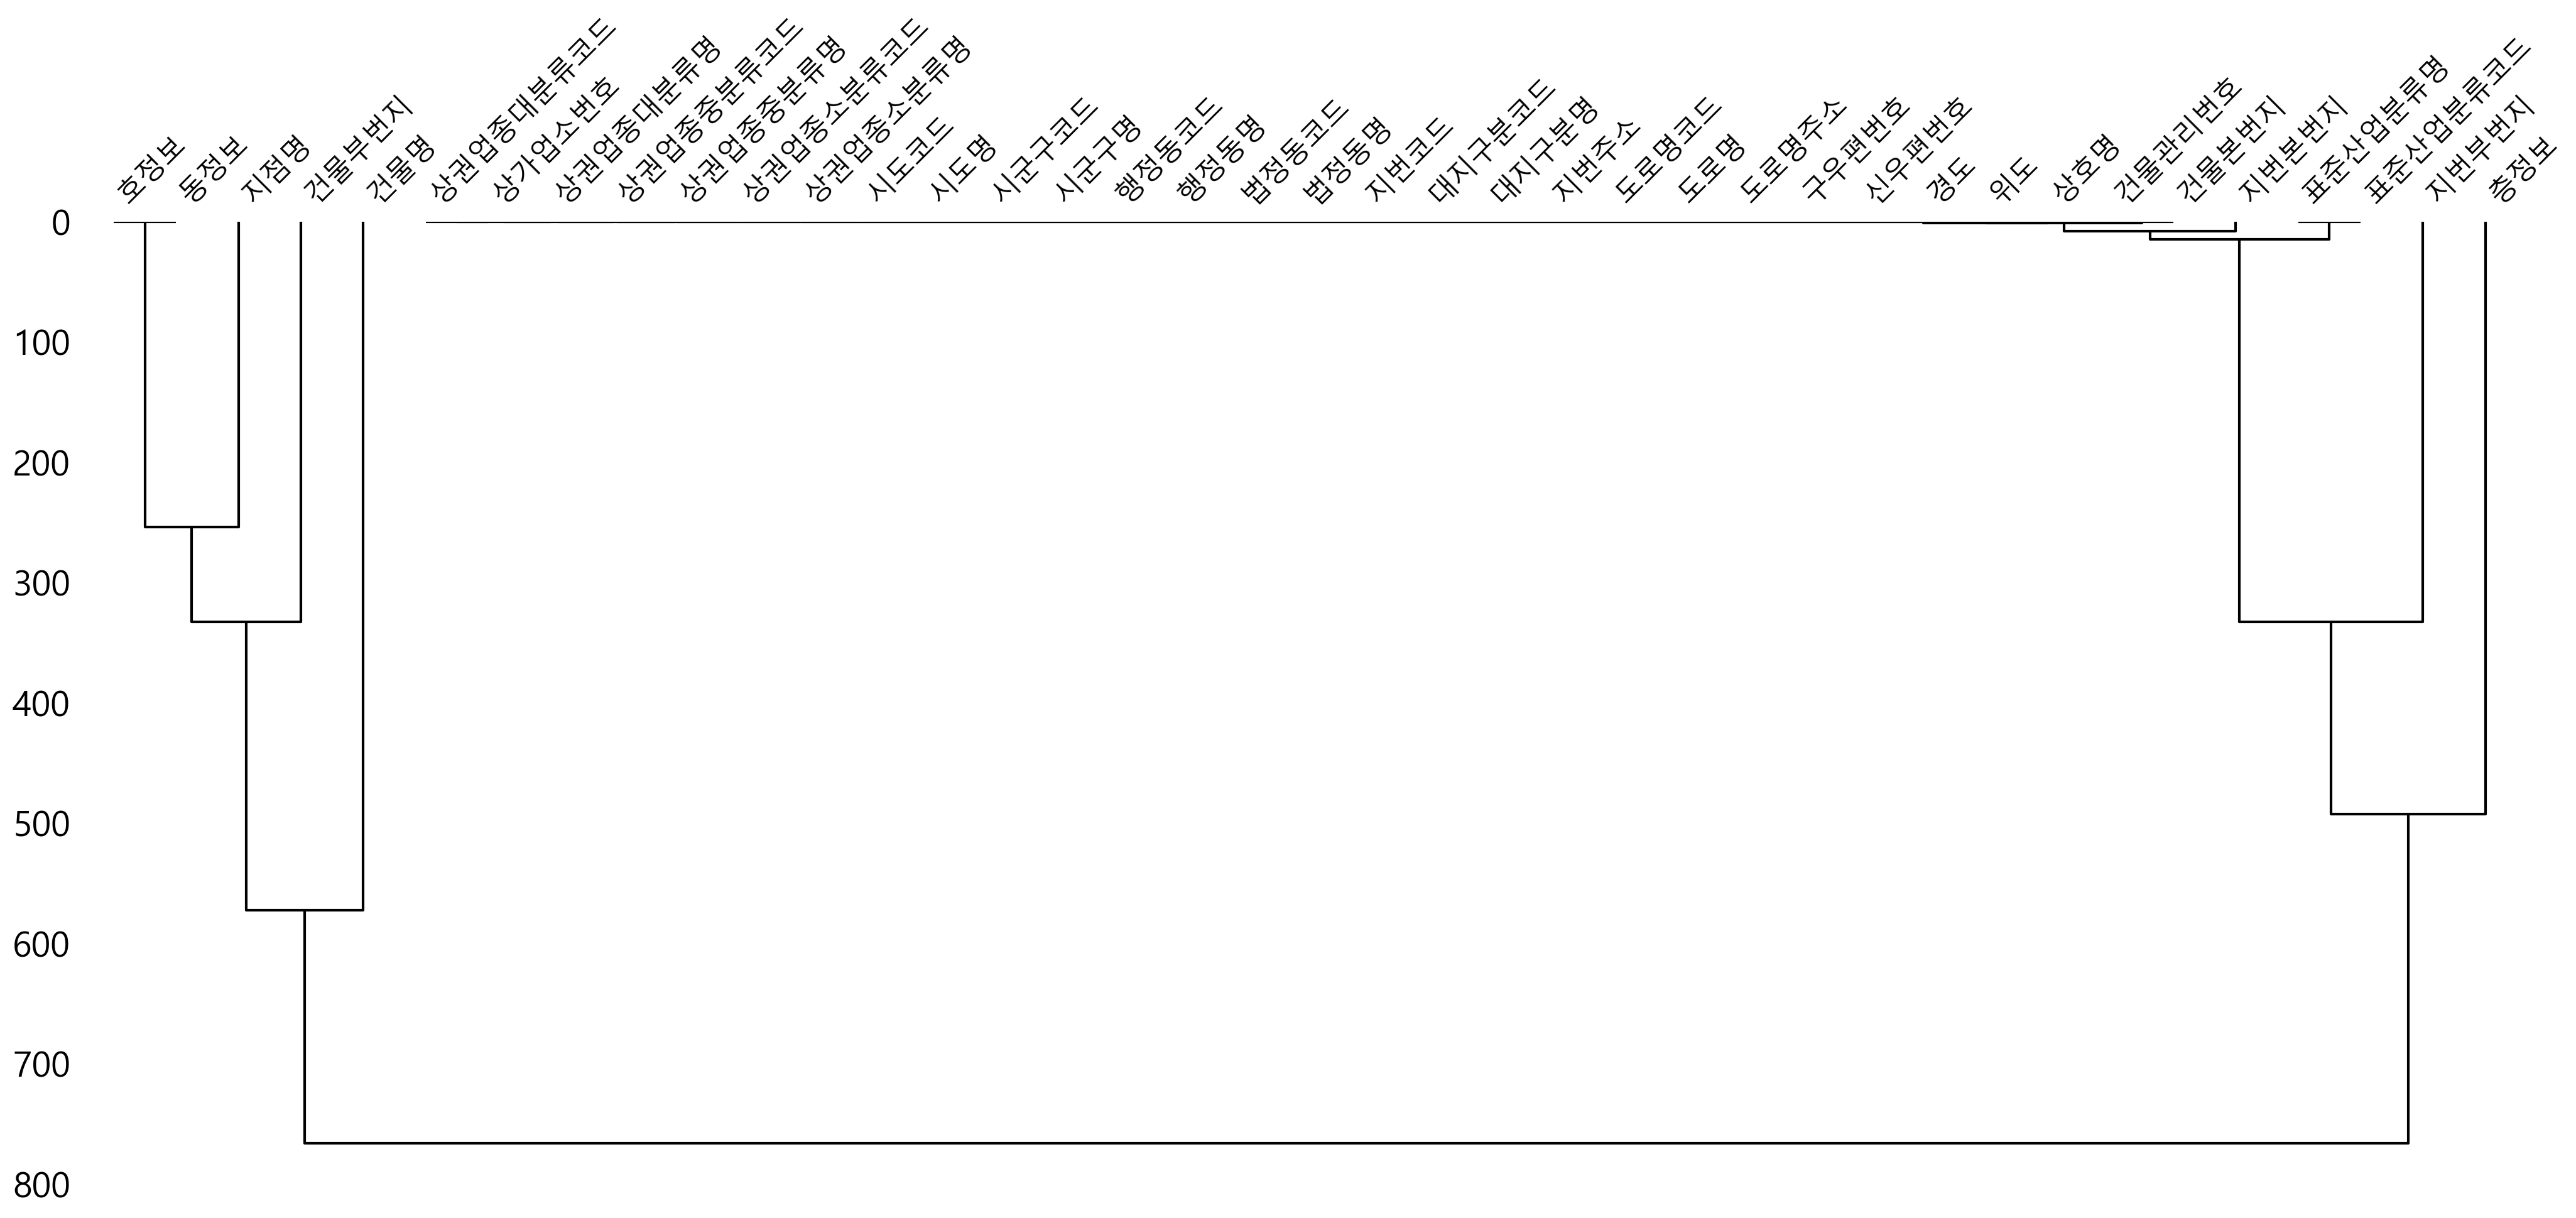

In [35]:
msno.dendrogram(df)

## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다

In [37]:
df.head(3)
df.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000
696053,MA0101202502A0114753,안목,부산역점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2617010100112000004006724,NaN,부산광역시 동구 중앙대로214번길 3-10,601838,48733,NaN,1,NaN,129.041453,35.116696


# ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

# ③ 결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화
- (정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)  

In [41]:
miss_cnt = df.isnull().sum()

<Axes: >

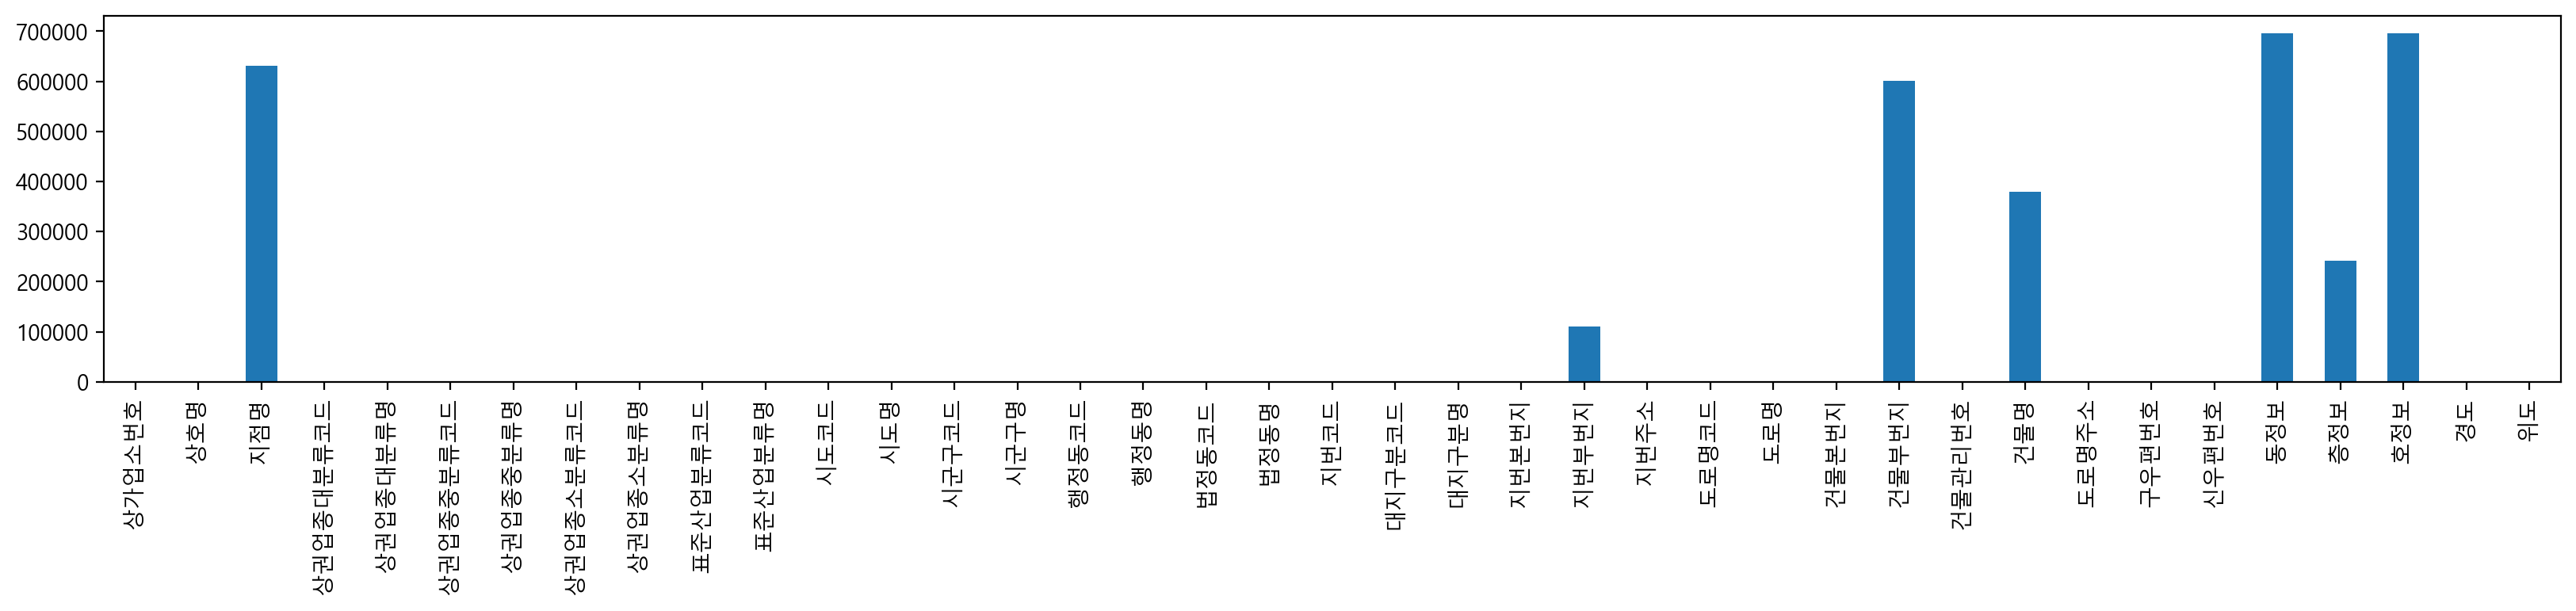

In [44]:
# bar 정렬 전
miss_cnt.plot.bar(figsize=(20,3))

<Axes: >

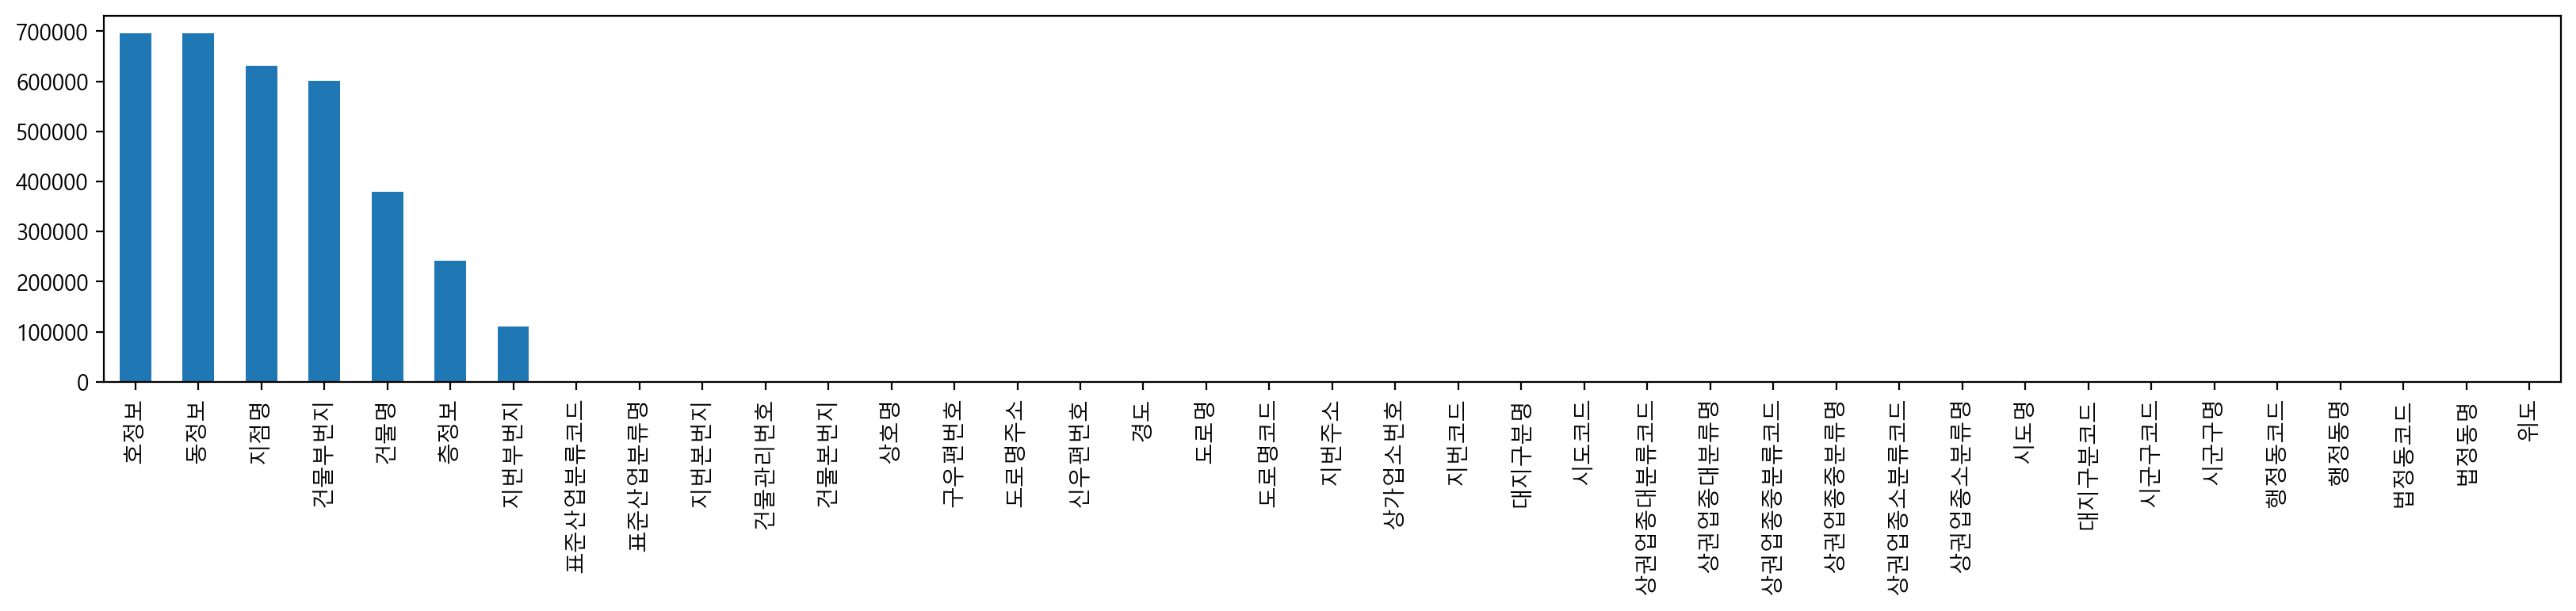

In [50]:
# bar 정렬후
miss_cnt_sort = miss_cnt.sort_values(ascending=False)
miss_cnt_sort.plot.bar(figsize=(20,3))

<Axes: >

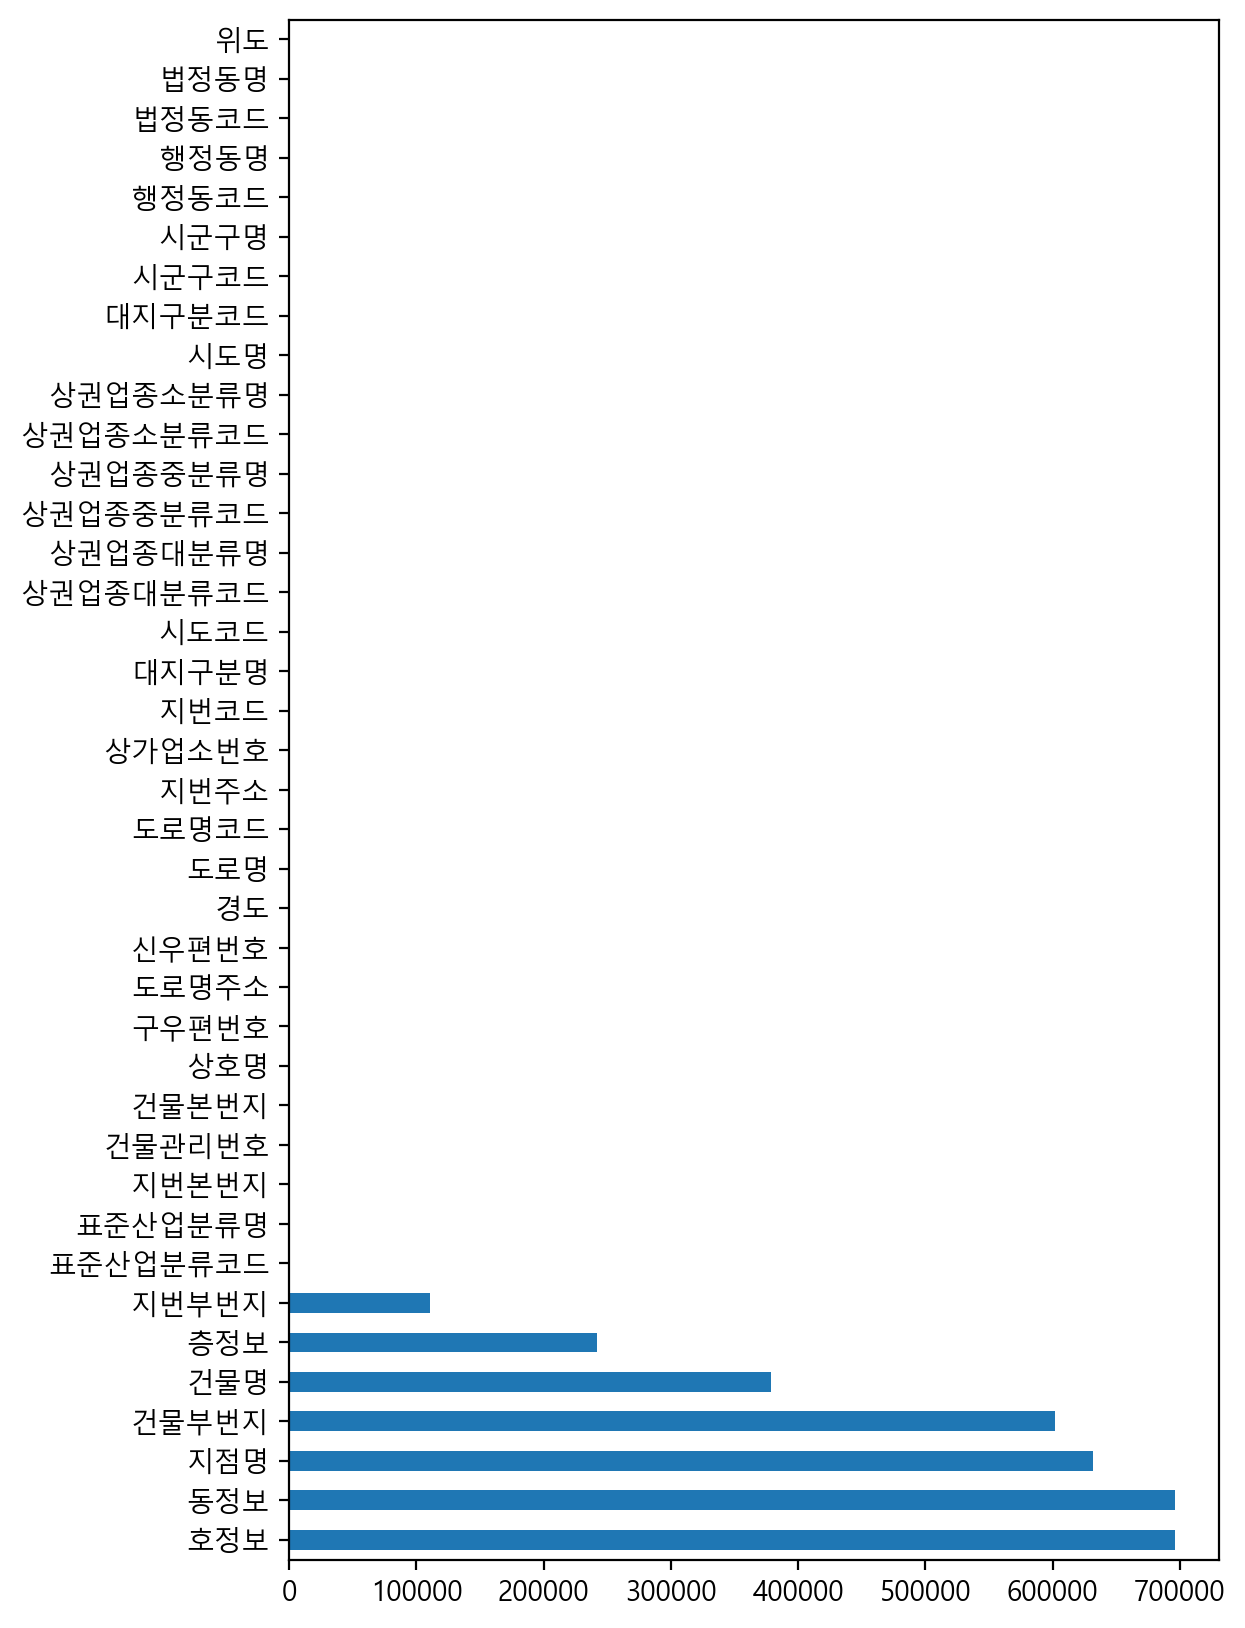

In [51]:
# barh 정렬 전
miss_cnt_sort.plot.barh(figsize=(6,10))

<Axes: >

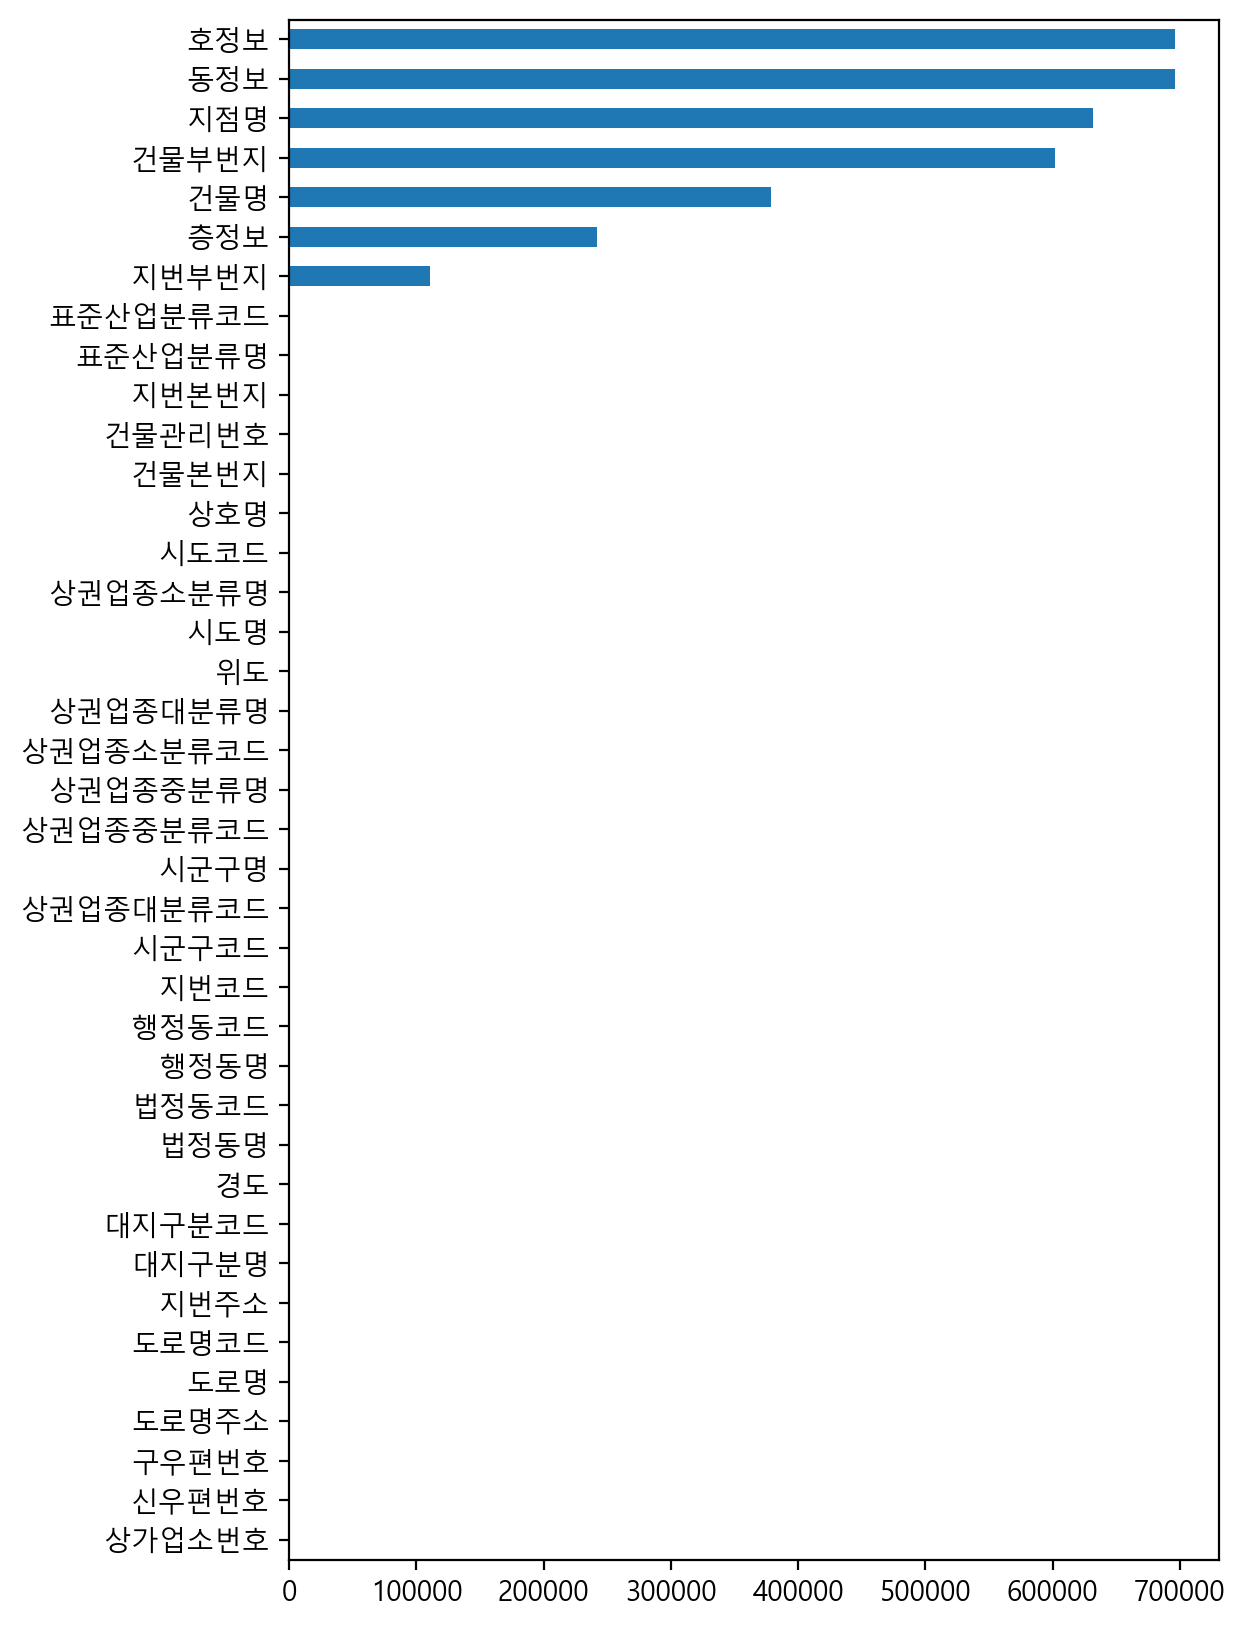

In [49]:
# barh 정렬 후
miss_cnt_sort = miss_cnt.sort_values()
miss_cnt_sort.plot.barh(figsize=(6,10))

# ④ 결측치가 없는 컬럼는 제외하고 시각화
- (정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [52]:
only_missing_cnt = miss_cnt[miss_cnt!=0]

In [53]:
only_missing_cnt

상호명              1
지점명         631602
표준산업분류코드       215
표준산업분류명        215
지번본번지           63
지번부번지       110516
건물본번지            1
건물부번지       601472
건물관리번호           1
건물명         378863
동정보         696054
층정보         241623
호정보         696054
dtype: int64

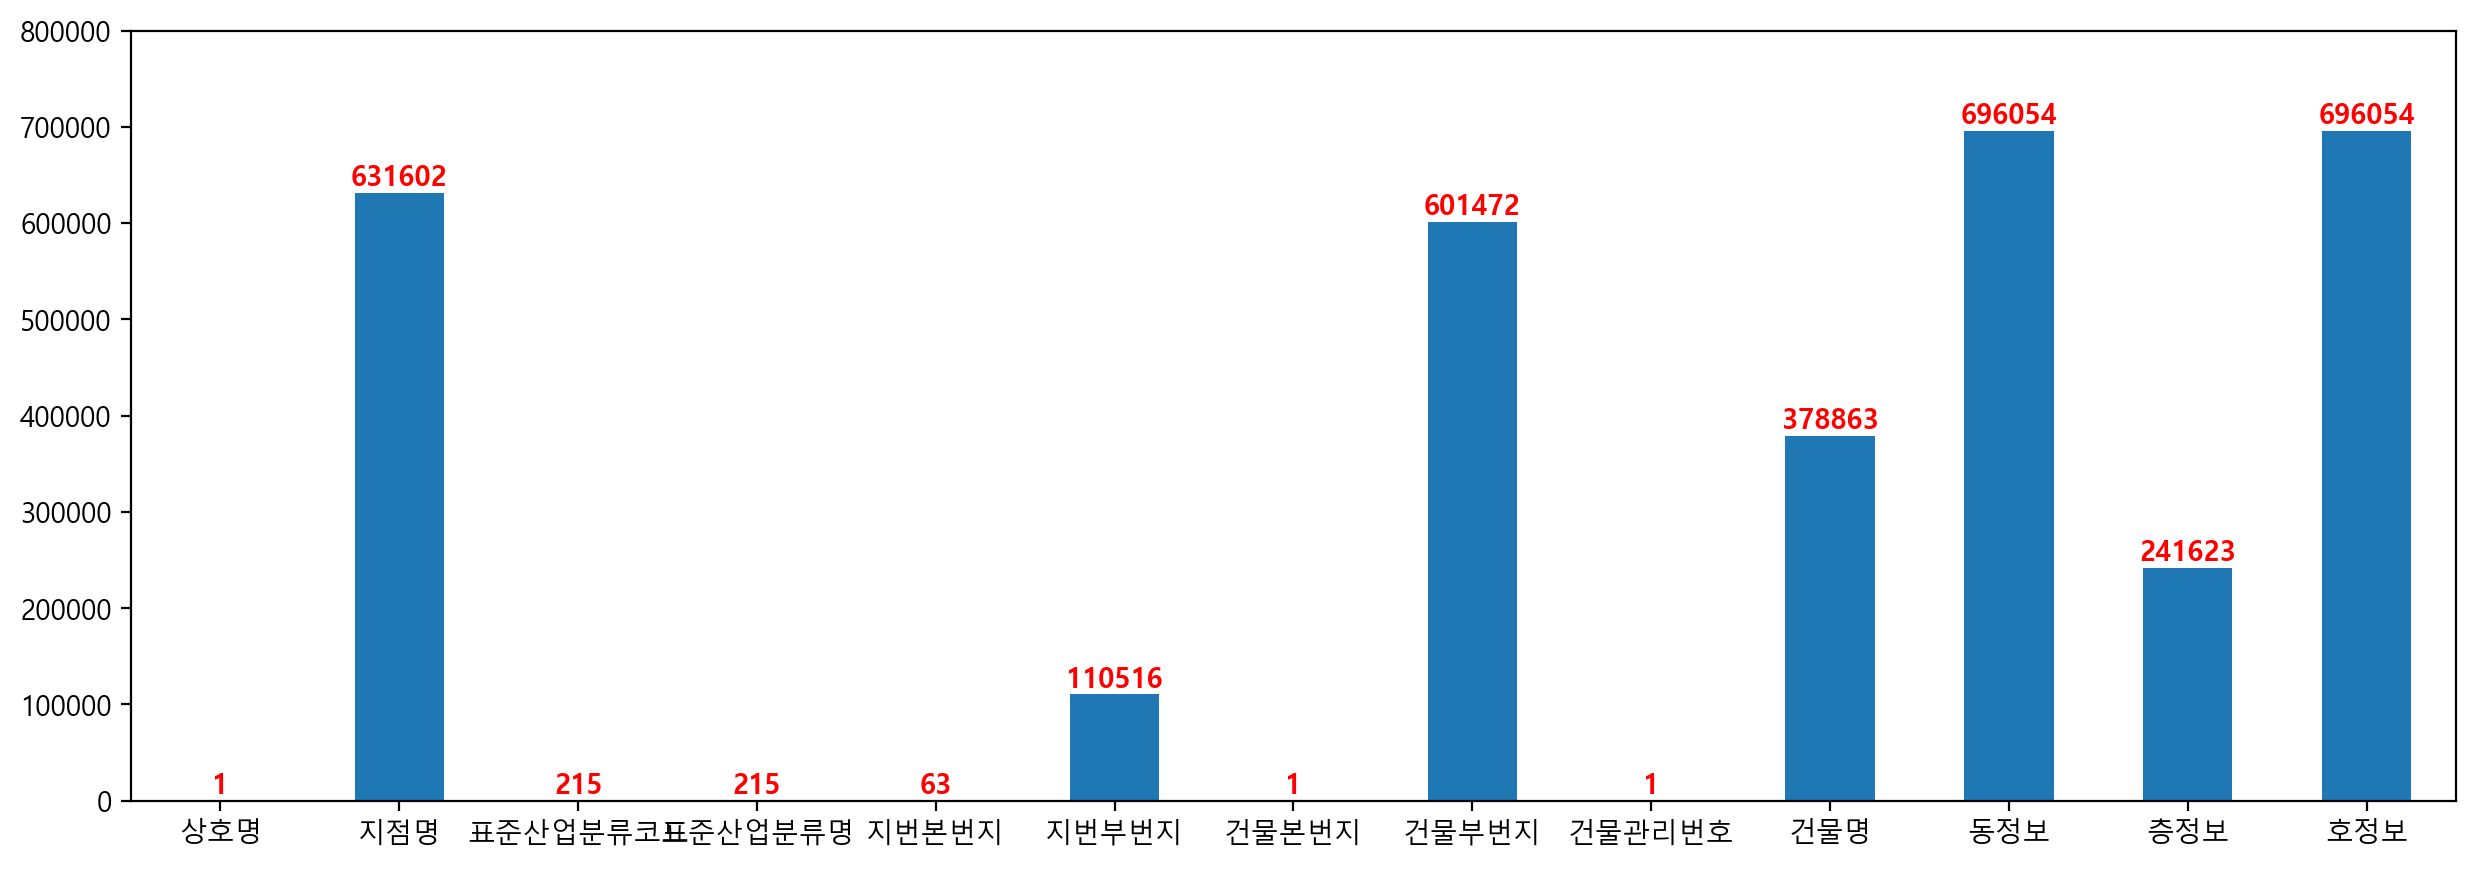

In [79]:
only_missing_cnt.plot.bar(figsize=(15,5), rot=0,
                         ylim=[0, 800000])
for idx, val in enumerate(only_missing_cnt):
        plt.text(idx, val, val, color = 'r', weight='bold', va='bottom', ha='center')

<Axes: >

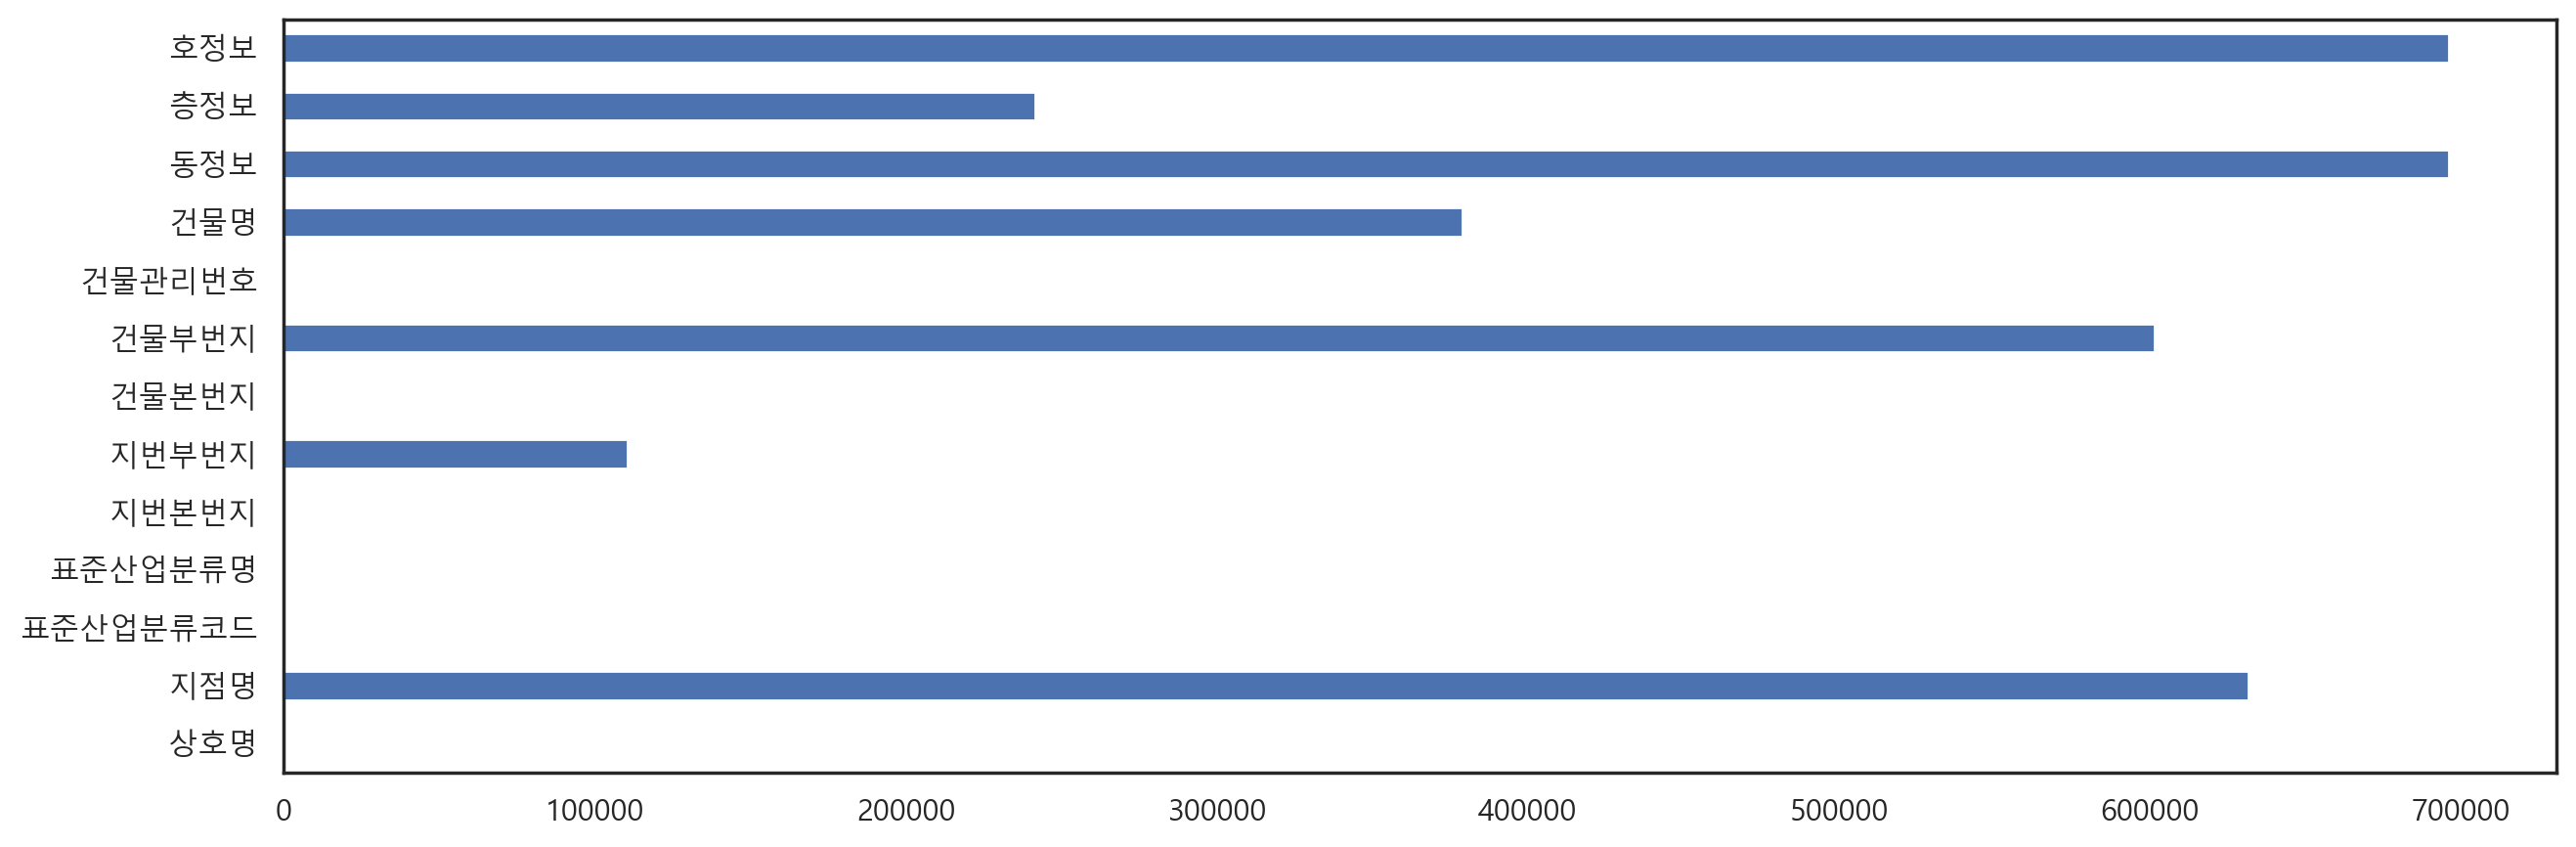

In [83]:
only_missing_cnt.plot.barh(figsize=(15,5))

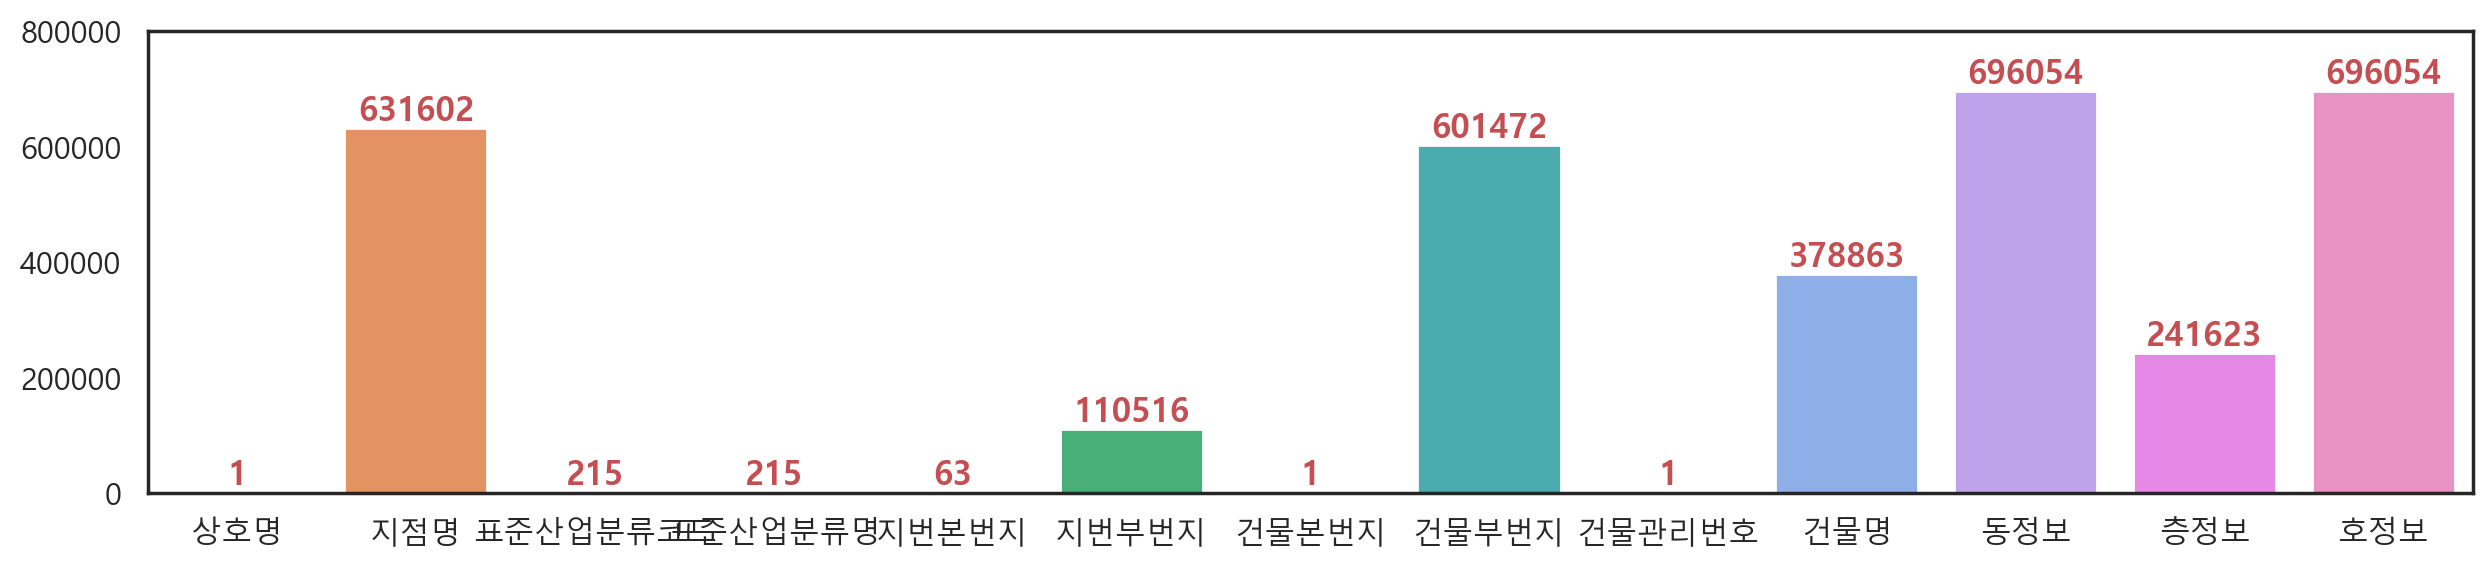

In [87]:
sns.barplot(x = only_missing_cnt.index,
            y = only_missing_cnt)
for idx, val in enumerate(only_missing_cnt):
    plt.text(idx, val, val, color = 'r', weight='bold', va='bottom', ha='center')
plt.ylim([0,800000])
plt.show()

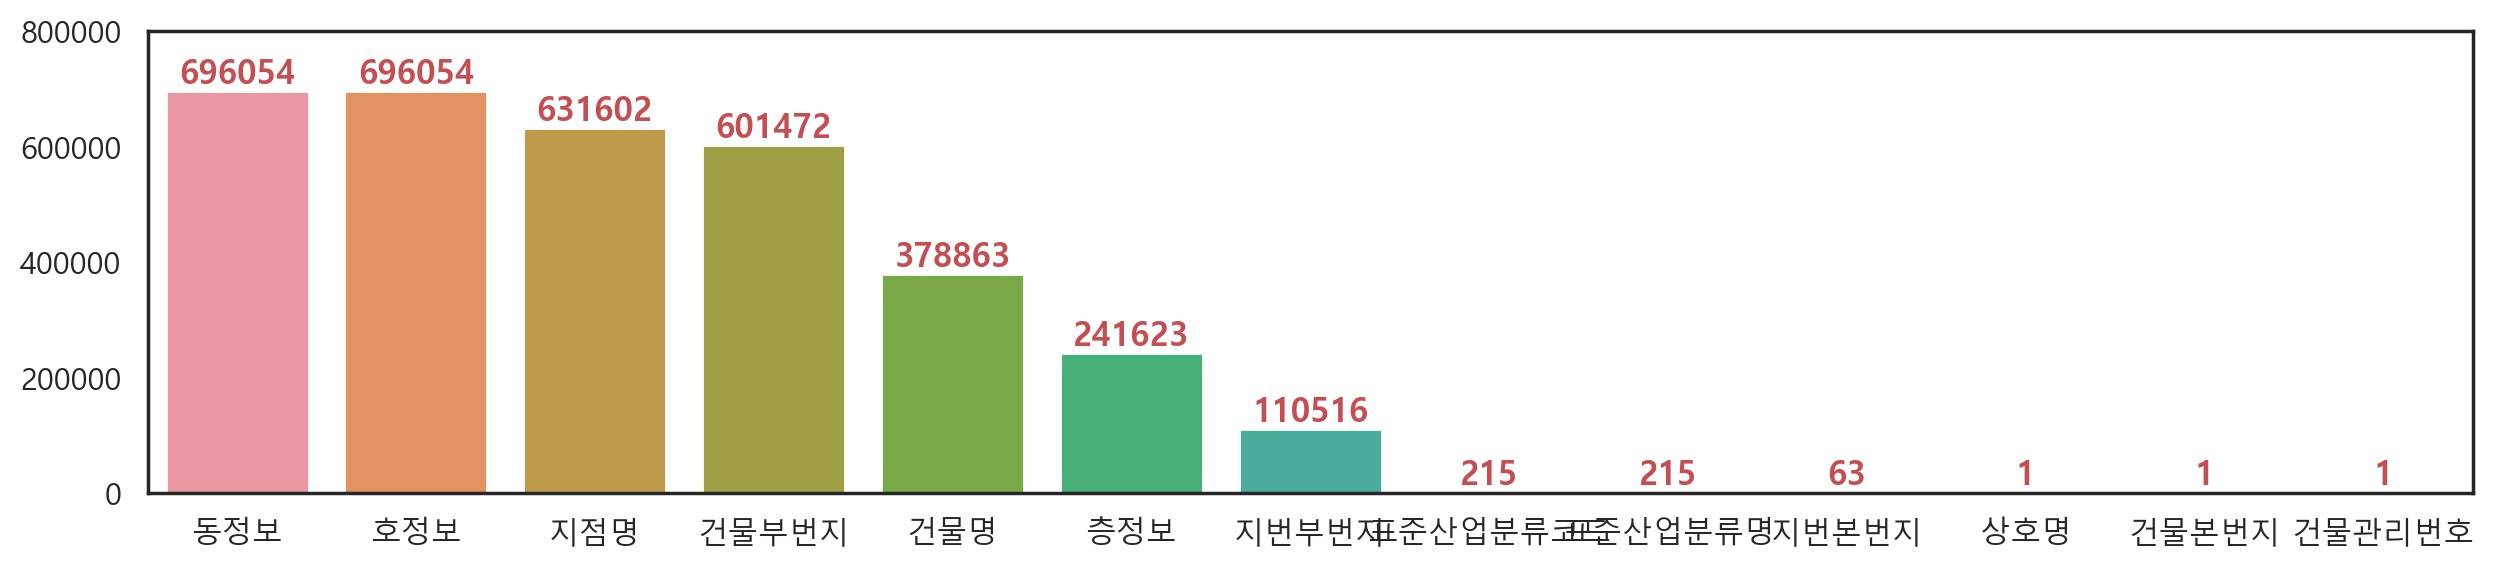

In [94]:
# 정렬 완료
only_missing_cnt_sd = only_missing_cnt.sort_values(ascending=False)
sns.barplot(x = only_missing_cnt_sd.index,
            y = only_missing_cnt_sd)
for idx, val in enumerate(only_missing_cnt_sd):
    plt.text(idx, val, val, color = 'r', weight='bold', va='bottom', ha='center')
plt.ylim([0,800000])
plt.show()

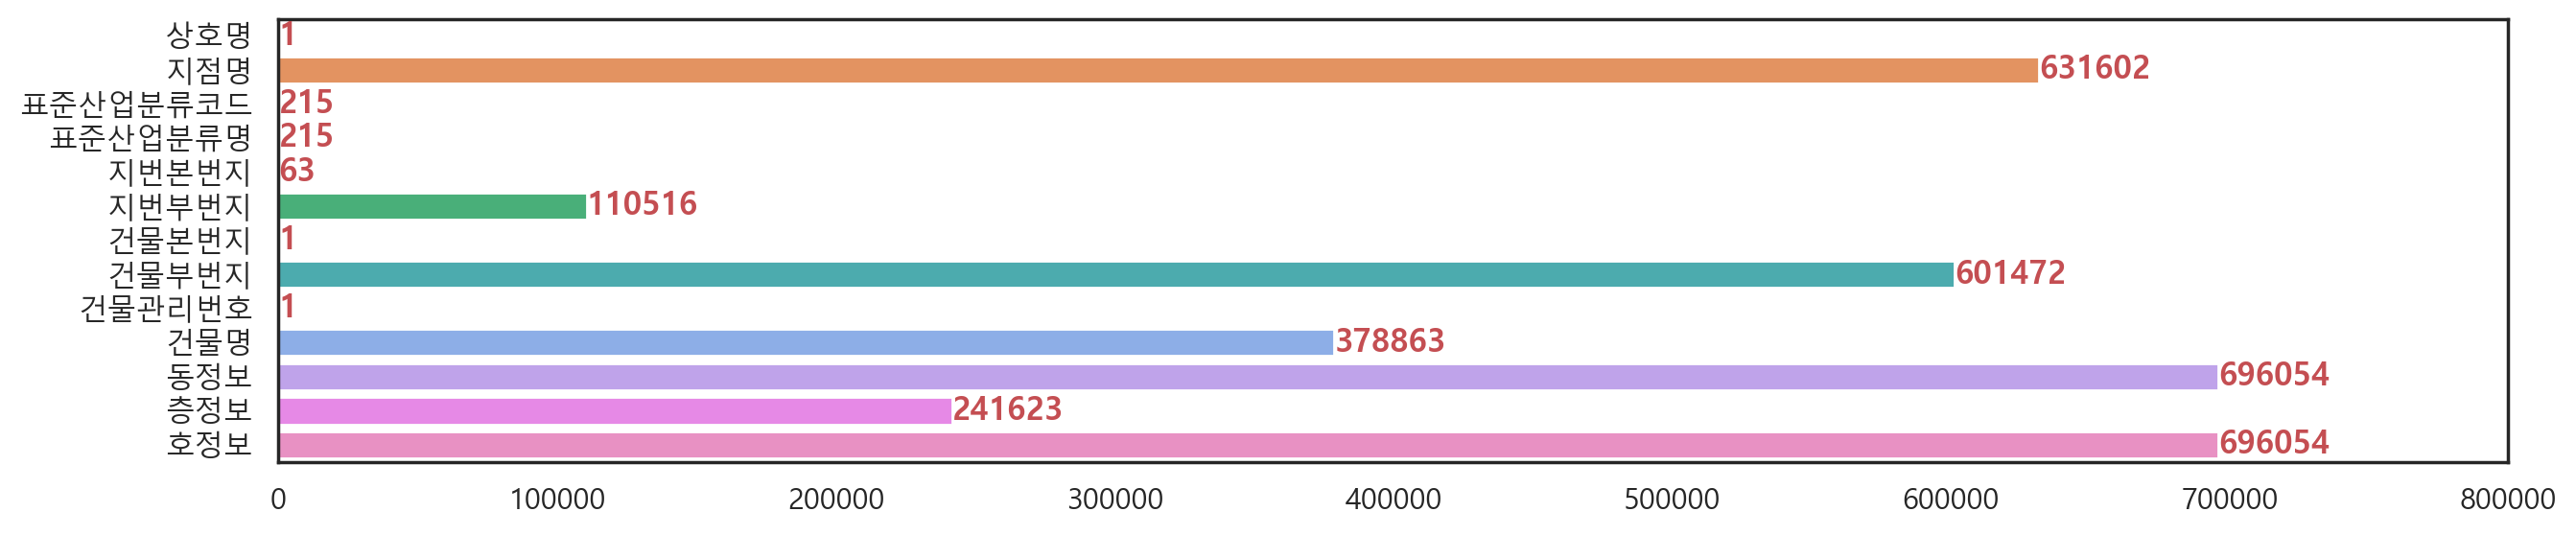

In [90]:
# 가로바 정렬 전
sns.barplot(x = only_missing_cnt,
            y = only_missing_cnt.index)
for idx, val in enumerate(only_missing_cnt):
    plt.text(val, idx, val, color = 'r', weight='bold', va='center', ha='left')
plt.xlim([0,800000])
plt.show()

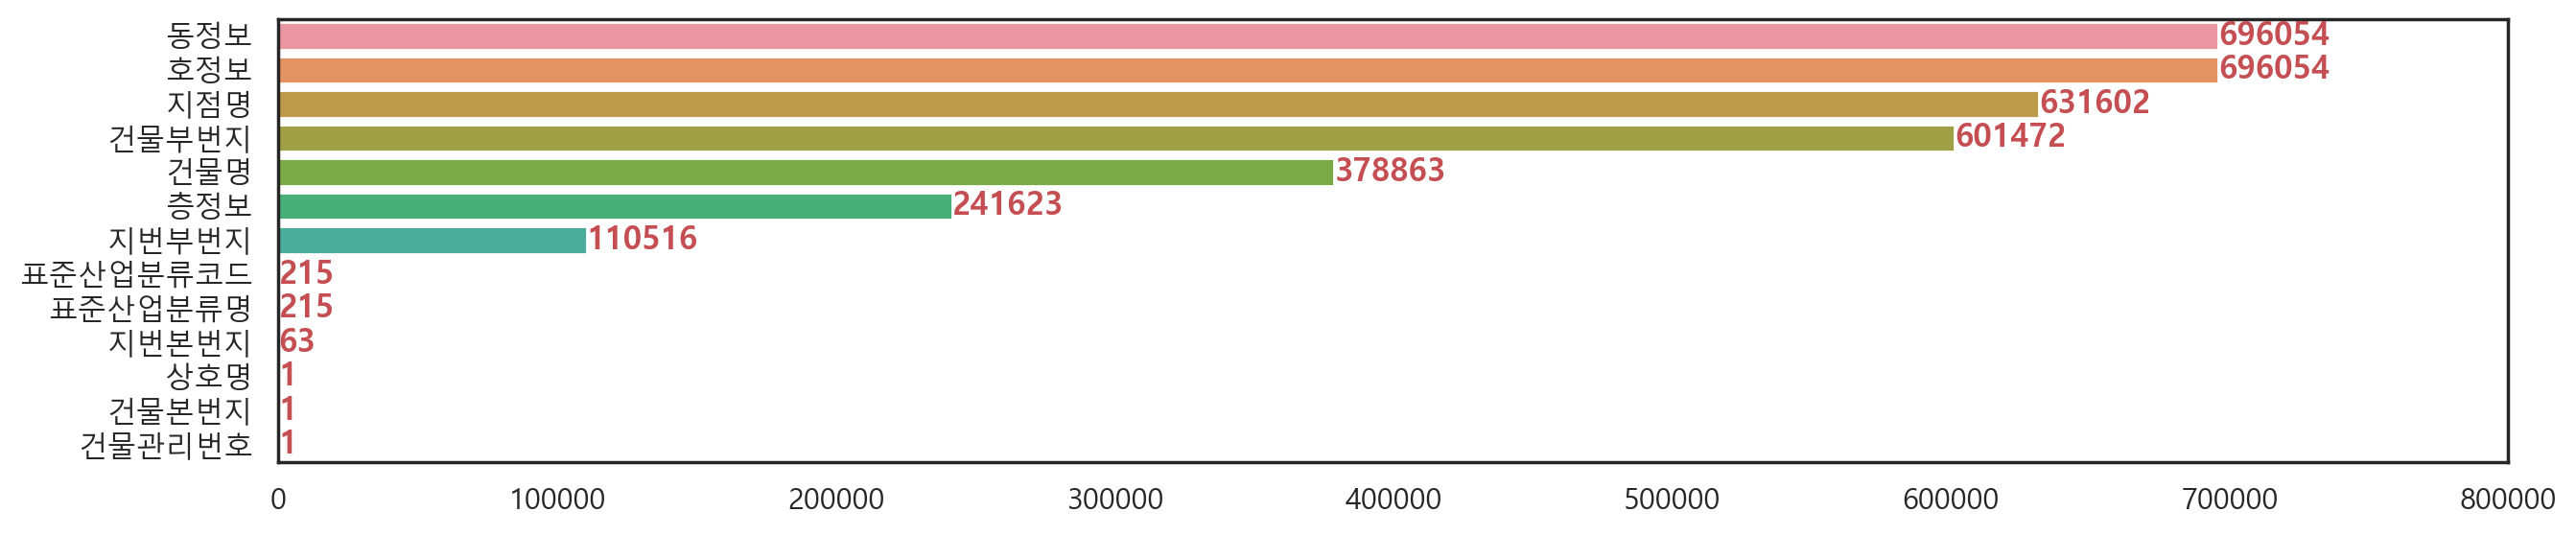

In [99]:
# 가로바 정렬 후
only_missing_cnt_sa = only_missing_cnt.sort_values(ascending=False)
sns.barplot(x = only_missing_cnt_sa,
            y = only_missing_cnt_sa.index)
for idx, val in enumerate(only_missing_cnt_sa):
    plt.text(val, idx, val, color = 'r', weight='bold', va='center', ha='left')
plt.xlim([0,800000])
plt.show()

#  문제 4. df 데이터 셋에서 사용하지 않을 컬럼은 제거
## ①	결측치가 너무 많은 컬럼은 제거
- 결측치가 너무 많은 상위 9개 컬럼은 제거함

In [101]:
# 결측치가 너무 많은 상위 9개 칼럼
not_use = df.isna().sum().sort_values(ascending=False).head(9)
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

## ② 컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함
- ( df.columns.str.contains(“코드|번호”) 이용)
- ( df.columns.str.find(‘코드”)!=-1 ) | ( df.columns.str.find(‘번호”)!=-1 )

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

In [103]:
# 컬럼 삭제전 메모리 사용량 :  memory usage: 207.1+ MB
print('컬럼 제거전 shape :', df.shape)
df.drop(not_use.index, axis = 1, inplace=True)
print('컬럼 제거후 shape :', df.shape)

컬럼 제거전 shape : (696054, 39)
컬럼 제거후 shape : (696054, 30)


In [115]:
# 코드로 끝나는 녀석들, 번호로 끝나는 녀석들
cols = df.columns
cols[ (cols.str.find('코드')!=-1) |  (cols.str.find('번호')!=-1) ]

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [116]:
# 자주 쓰는 만큼 함수가 있다. contains('코드|번호')
drop_cols = df.columns[df.columns.str.contains('코드|번호')]

## ③ 컬럼을 제거 후 제거 전 비교
- memory usage를 확인하고 줄어든 columns수도 확인한다.

In [117]:
print('컬럼 제거전 shape :', df.shape)
df.drop(drop_cols, axis = 1, inplace=True)
print('컬럼 제거후 shape :', df.shape)

컬럼 제거전 shape : (696054, 30)
컬럼 제거후 shape : (696054, 16)


In [118]:
df.info()
# 컬럼 삭제 전 메모리 사용량 :  memory usage: 207.1+ MB
# 컬럼 삭제 !후! 메모리 사용량 :  memory usage: 85.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       696053 non-null  object 
 1   상권업종대분류명  696054 non-null  object 
 2   상권업종중분류명  696054 non-null  object 
 3   상권업종소분류명  696054 non-null  object 
 4   시도명       696054 non-null  object 
 5   시군구명      696054 non-null  object 
 6   행정동명      696054 non-null  object 
 7   법정동명      696054 non-null  object 
 8   대지구분명     696054 non-null  object 
 9   지번본번지     695991 non-null  float64
 10  지번주소      696054 non-null  object 
 11  도로명       696054 non-null  object 
 12  건물본번지     696053 non-null  float64
 13  도로명주소     696054 non-null  object 
 14  경도        696054 non-null  float64
 15  위도        696054 non-null  float64
dtypes: float64(4), object(12)
memory usage: 85.0+ MB


# df 파일 io

In [119]:
df.to_csv(r'C:\ai_x\download\shareData\상가정보_20250331\서울부산상가정보(최종).csv',
         encoding='utf-8',
         index=False)

# 5. df 데이터 셋의 값을 가져온다
- (loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)
## ① 상호명 필드만 가져온다

In [122]:
df['상호명'] # 시리즈
df[['상호명']] # 데이터프레임

,상호명
0,부동산임대김은숙
1,한국황토건축연구소
2,소망공인중개사사무소
3,고향집
4,보석나라
...,...
696049,포마크파티룸
696050,정옥농장
696051,지안영어교습소
696052,히어로스포츠


## ② 상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [124]:
df.상호명.value_counts()

컴퓨터수리         576
입시·교과학원       351
입주청소          308
김밥천국          232
현대공인중개사사무소    195
             ... 
오오토리            1
이천산업            1
미가뷰티            1
가산문고            1
지안영어교습소         1
Name: 상호명, Length: 535747, dtype: int64

In [129]:
df.groupby('상호명')['상호명'].count().sort_values(ascending=False)

상호명
컴퓨터수리                  576
입시·교과학원                351
입주청소                   308
김밥천국                   232
현대공인중개사사무소             195
                      ... 
본푸드서비스삼표점주               1
본푸드서비스본우리집밥이마트수서점        1
본푸드서비스본우리집밥본그룹본사점        1
본푸드서비스본우리집밥대치위담한방병원      1
［주］세일캠퍼스                 1
Name: 상호명, Length: 535747, dtype: int64

In [134]:
df.pivot_table(index = '상호명',
               values = '시도명',
               aggfunc='count').sort_values(by='시도명', ascending=False)

,시도명
상호명,
컴퓨터수리,576
입시·교과학원,351
입주청소,308
김밥천국,232
현대공인중개사사무소,195
...,...
본푸드서비스삼표점주,1
본푸드서비스본우리집밥이마트수서점,1
본푸드서비스본우리집밥본그룹본사점,1


In [135]:
# 결측치가 없는 컬럼 확인해서 그룹핑에 참고하기
df.isna().sum()

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

## ③ “상호명”과 "도로명주소” 컬럼 가져오기

In [136]:
df[['상호명', '도로명주소']]

,상호명,도로명주소
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
3,고향집,서울특별시 종로구 돈화문로4길 30
4,보석나라,서울특별시 구로구 개봉로3길 23
...,...,...
696049,포마크파티룸,부산광역시 부산진구 중앙대로 763-1
696050,정옥농장,부산광역시 기장군 장안읍 오리길 69-12
696051,지안영어교습소,부산광역시 해운대구 세실로 31
696052,히어로스포츠,부산광역시 사상구 가야대로366번길 22


## ④ 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)


In [137]:
df.loc[:2]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


In [138]:
df.iloc[:3]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


# 6. 기술 통계값 보기 
- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

### **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도


## ① df 데이터셋의 요약기술 통계량

In [141]:
# df.describe() : 수치형데이터에 대해서만 요약기술 통계량 표시
# df.describe(include='object') : obj형에 대한 기술 통계량 : 최빈값
df.describe(include='all').round()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,695991.0,696054,696054,696053.0,696054,696054.0,696054.0
unique,535747,10,75,247,2,39,628,647,2,NaN,220969,18864,NaN,223665,NaN,NaN
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,NaN,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,NaN,서울특별시 송파구 충민로 66,NaN,NaN
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,NaN,938,4462,NaN,1200,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481.0,NaN,NaN,144.0,NaN,127.0,37.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.0,NaN,NaN,263.0,NaN,1.0,1.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,127.0,35.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,19.0,NaN,127.0,37.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,NaN,NaN,47.0,NaN,127.0,38.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.0,NaN,NaN,152.0,NaN,127.0,38.0


## ② df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.

In [145]:
# df[['지번본번지','건물본번지']].info()
print('지번본번지 데이터 개수 : ', 695991 )
print('건물본번지 데이터 개수 : ', 696053  )
print('두 컬럼의 dtype, 메모리 사용량 : ', 'dtypes: float64(2)', 'memory usage: 10.6 MB'  )

지번본번지 데이터 개수 :  695991
건물본번지 데이터 개수 :  696053
두 컬럼의 dtype, 메모리 사용량 :  dtypes: float64(2) memory usage: 10.6 MB


## ③ “위도", "경도” 컬럼만의 요약 기술통계량

In [147]:
df[['위도','경도']].describe()

,위도,경도
count,696054.000000,696054.000000
mean,37.009921,127.455853
std,0.990450,0.866655
min,34.989747,126.768186
25%,37.474714,126.943200
50%,37.514521,127.034361
75%,37.560269,127.130725
max,37.692604,129.292220


# 7.	단별량 수치형 변수 시각화
## ① 위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

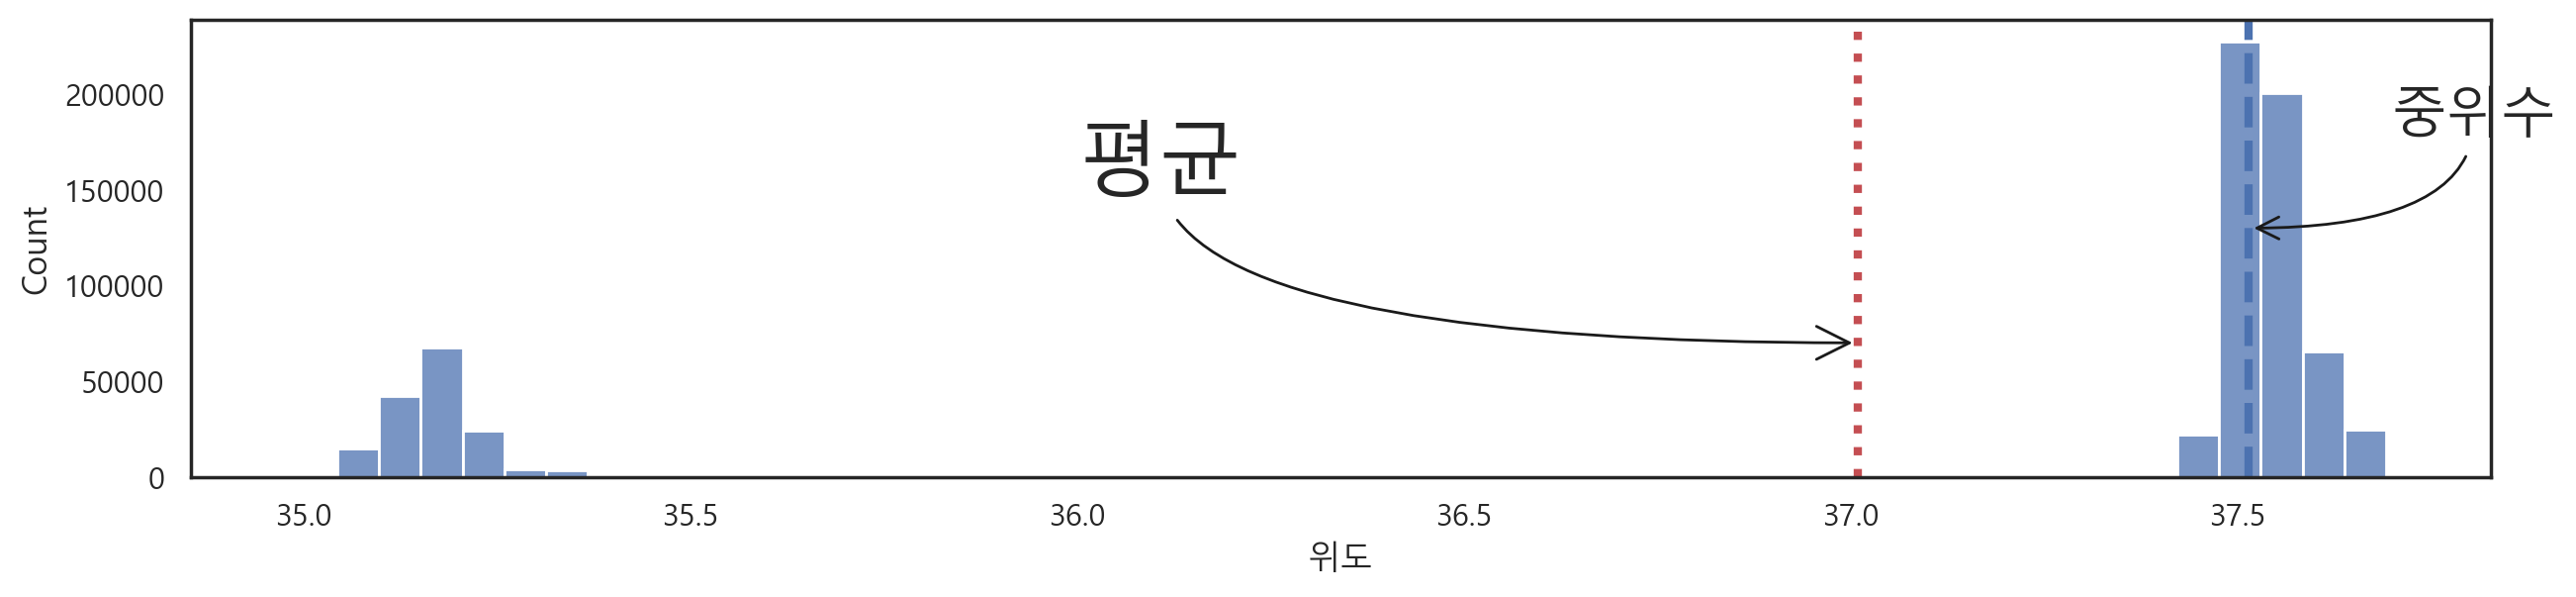

In [195]:
# 위도의 빈도표
ax = sns.histplot(df['위도'],bins=50)
ax.axvline(df['위도'].mean(), color = 'r', linestyle = ':', linewidth=3)
ax.annotate('평균', xy = (df['위도'].mean(), 70000), xytext = (36, 150000), 
            arrowprops = { 'arrowstyle' :  '->',
                           'connectionstyle':'angle3',
                              'color' : 'k'},
            fontsize = 30
           )
ax.axvline(df['위도'].median(), color = 'b', linestyle = '--', linewidth=3)
ax.annotate('중위수', xy = (df['위도'].median(), 130000), xytext = (37.7, 180000), 
            arrowprops = { 'arrowstyle' :  '->',
                           'connectionstyle':'angle3',
                              'color' : 'k'},
            fontsize = 20
           )
plt.show()

## ② 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

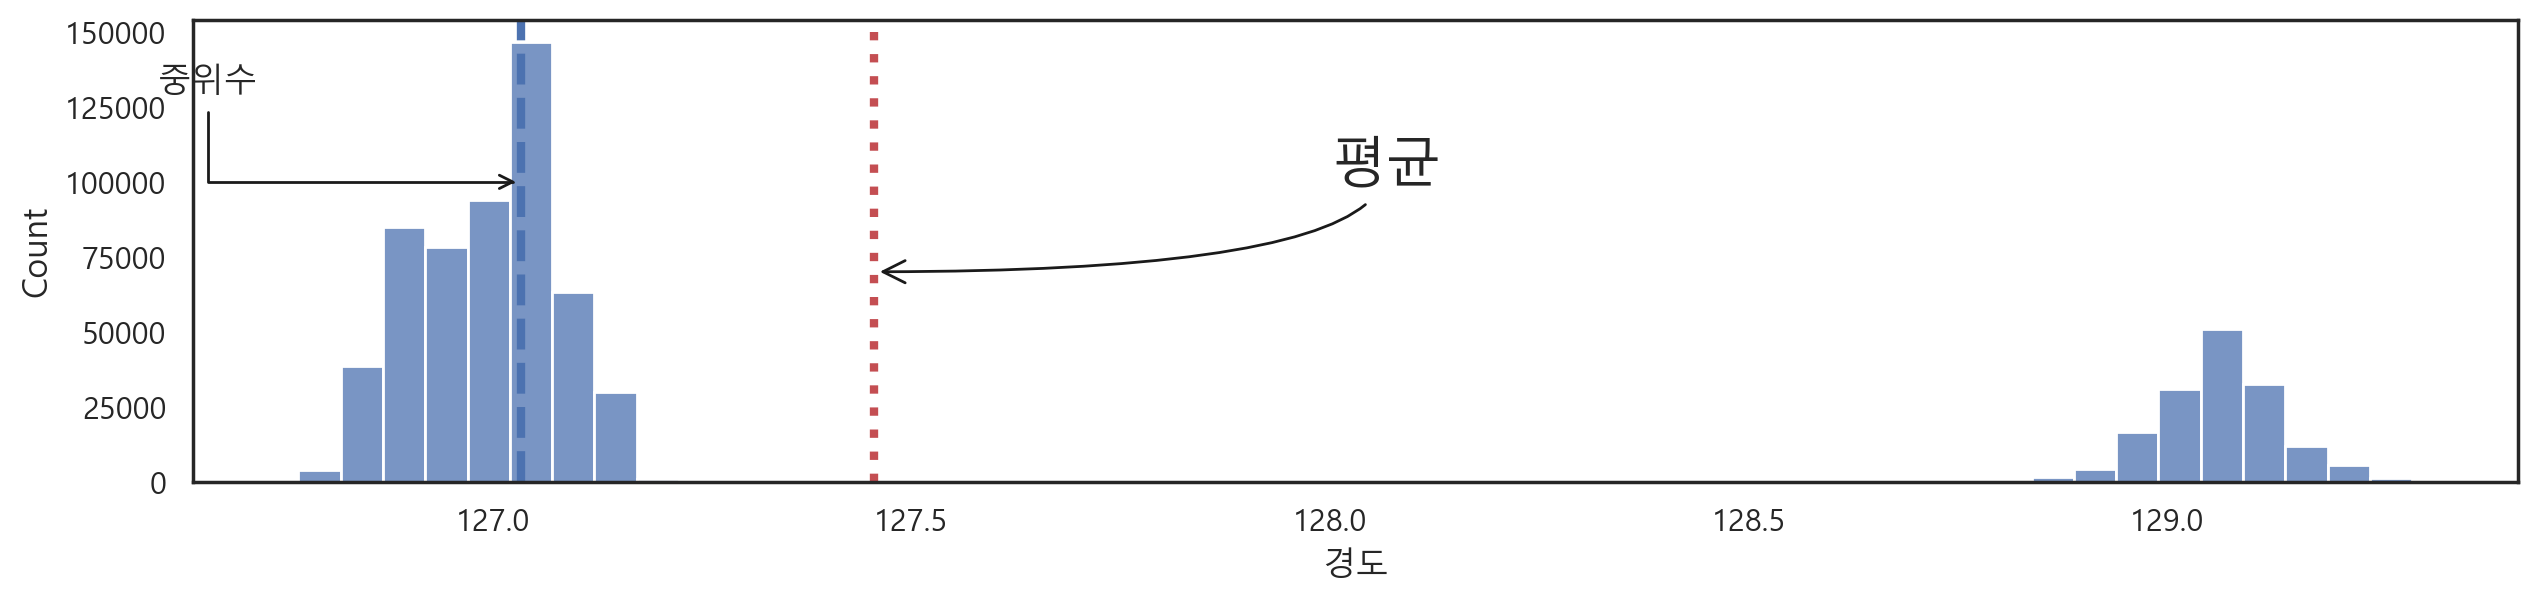

In [198]:
# 경도의 빈도표
ax = sns.histplot(df['경도'],bins=50)
ax.axvline(df['경도'].mean(), color = 'r', linestyle = ':', linewidth=3)
ax.annotate('평균', xy = (df['경도'].mean(), 70000), xytext = (128, 100000), 
            arrowprops = dict(arrowstyle= '->',
                           connectionstyle='angle3',
                              color = 'k'),
            fontsize = 20
           )
ax.axvline(df['경도'].median(), color = 'b', linestyle = '--', linewidth=3)
ax.annotate('중위수', xy = (df['경도'].median(), 100000), xytext = (126.6, 130000), 
            arrowprops = dict(arrowstyle= '->',
                           connectionstyle='angle',
                              color = 'k'),
            fontsize = 12
           )
plt.show()

# 8. 상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)

## ① 전체 숫자 컬럼끼리의 상관계수

In [200]:
corr = df.corr(numeric_only=True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## ② 상관계수를 이용하여 heatmap 시각화
- https://seaborn.pydata.org/examples/many_pairwise_correlations.html

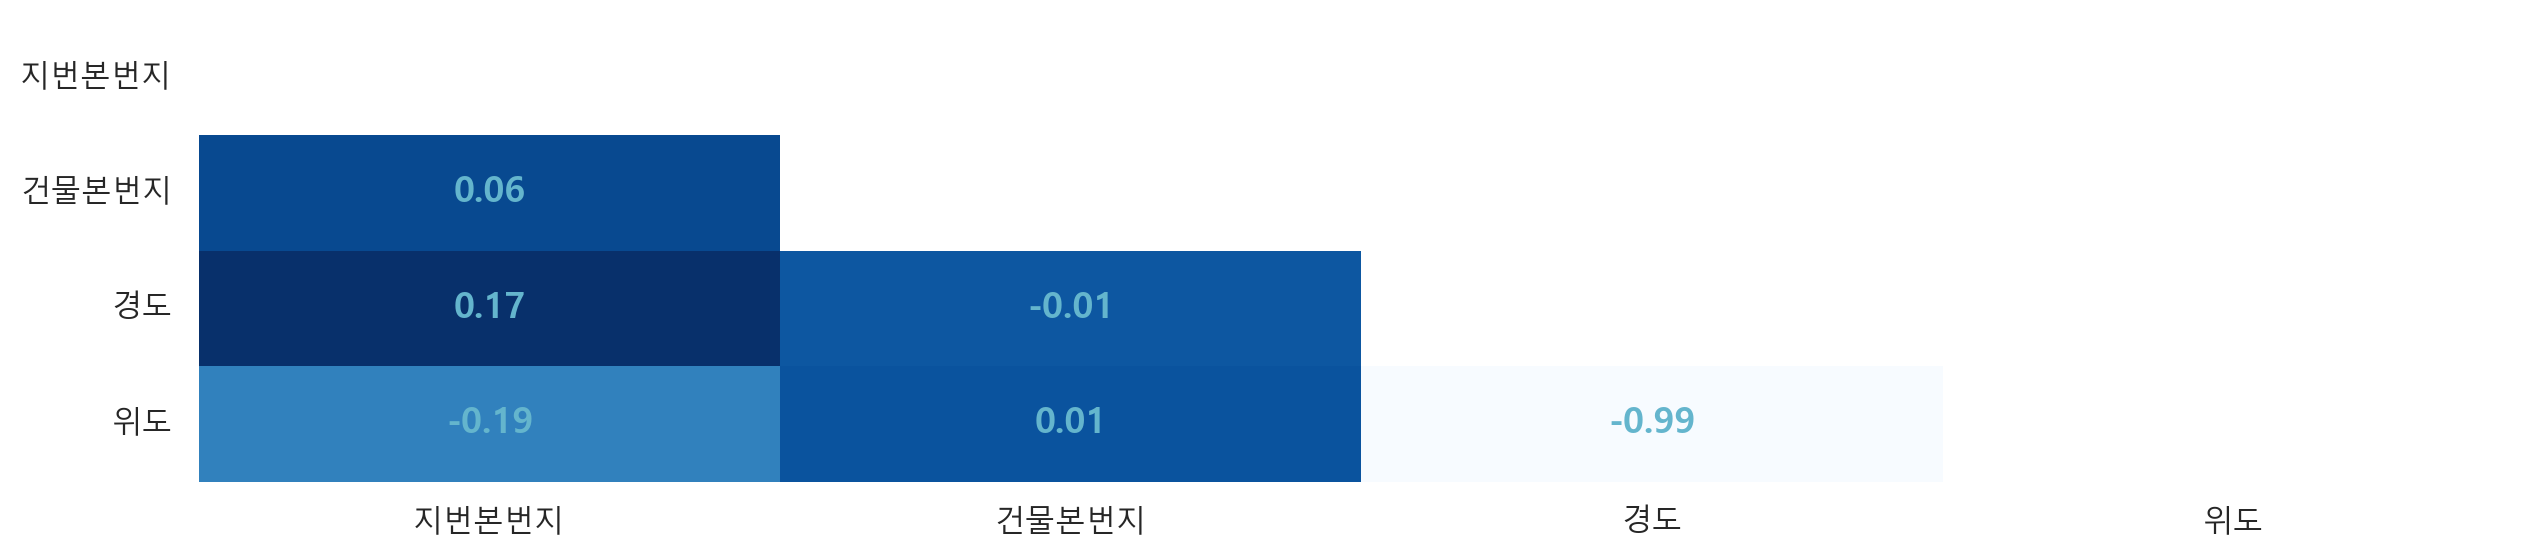

In [229]:
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='Blues', cbar=False,
           annot_kws=dict(weight = 'bold', color = 'c', size =13),
           mask = mask)
            
plt.show()

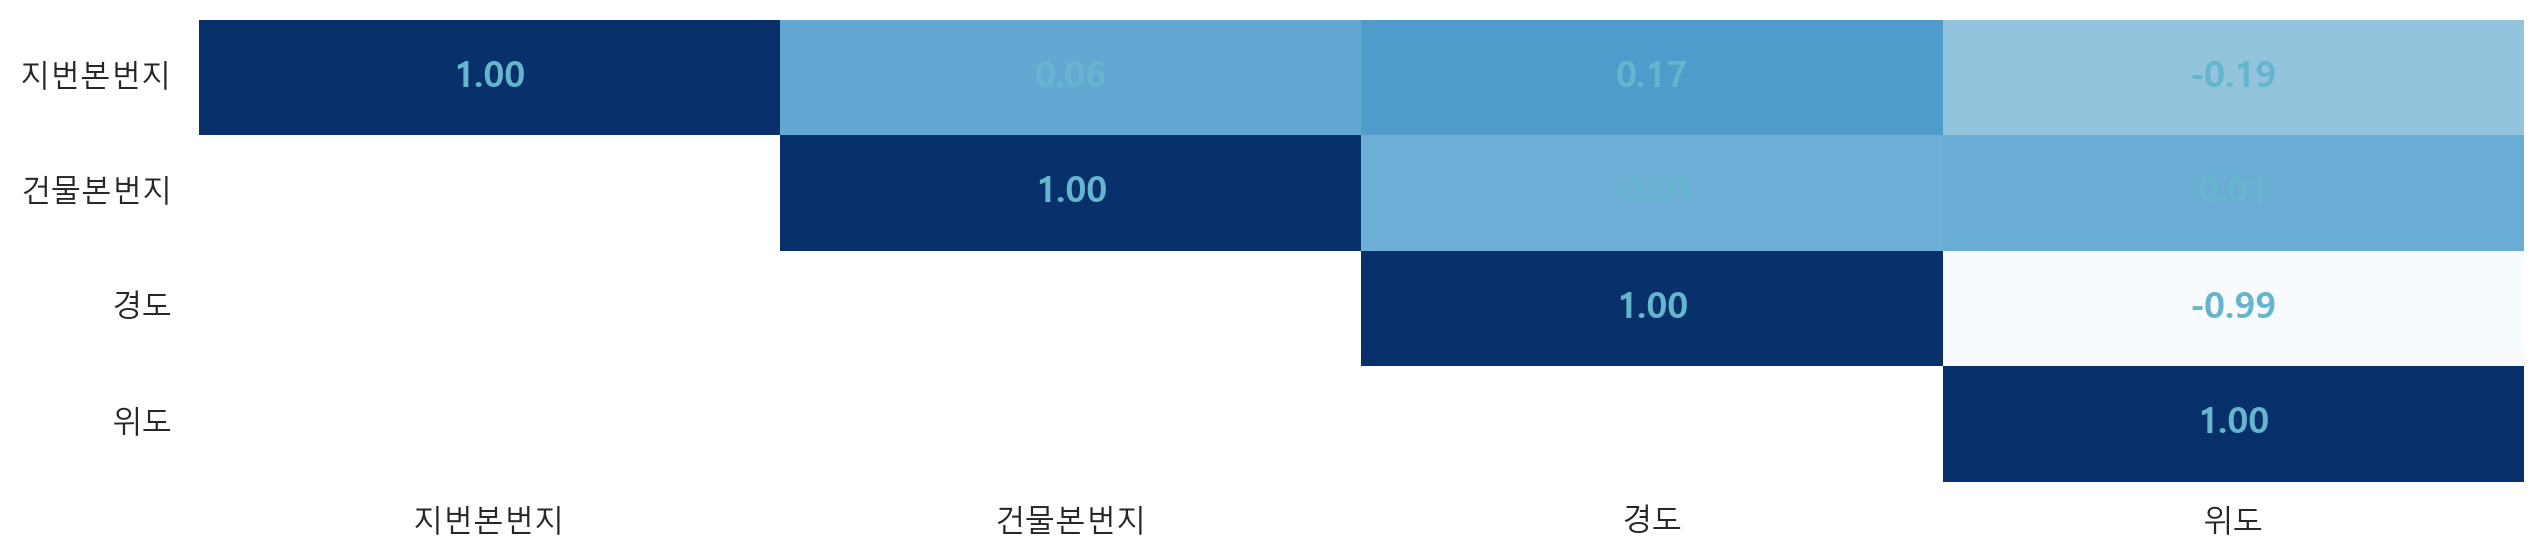

In [231]:
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='Blues', cbar=False,
           annot_kws=dict(weight = 'bold', color = 'c', size =13),
           mask = ~mask)
            
plt.show()

In [228]:
# 가릴것들은 가린다
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# np.ones_like 를 알아보자
np.ones_like(a)  # a 와 같은 구조의 배열을 만들어 1로 채움

array([[1., 1.],
       [1., 1.]])

In [216]:
a = np.array([[2.0,1],
            [1,1]])    # 2행 2열 배열

temp = np.ones((2,2), dtype=bool )  # 매개변수에 온 구조의 배열에 1로 반환
temp

array([[ True,  True],
       [ True,  True]])

In [222]:
np.triu(temp, k=1) # np.triu 함수는 변수로 행렬을 받아 대각선 아래를 False로 반환

array([[False,  True],
       [False, False]])

# 9. 경도와 위도 컬럼을 이용하여 산점도
- https://seaborn.pydata.org/examples/anscombes_quartet.html
## ① X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

## ② 경도와 위도의 산점도를 “시도명” 컬럼별로 서브플롯으로 시각화

## ③ 위의 1번에서 시각화된 산점도를 바탕으로 회귀선을 그린다.

## ④ 위의 2번에서 시각화된 산점도를 바탕으로 회귀선을 서브 플롯으로 그린다.

<Axes: xlabel='경도', ylabel='위도'>

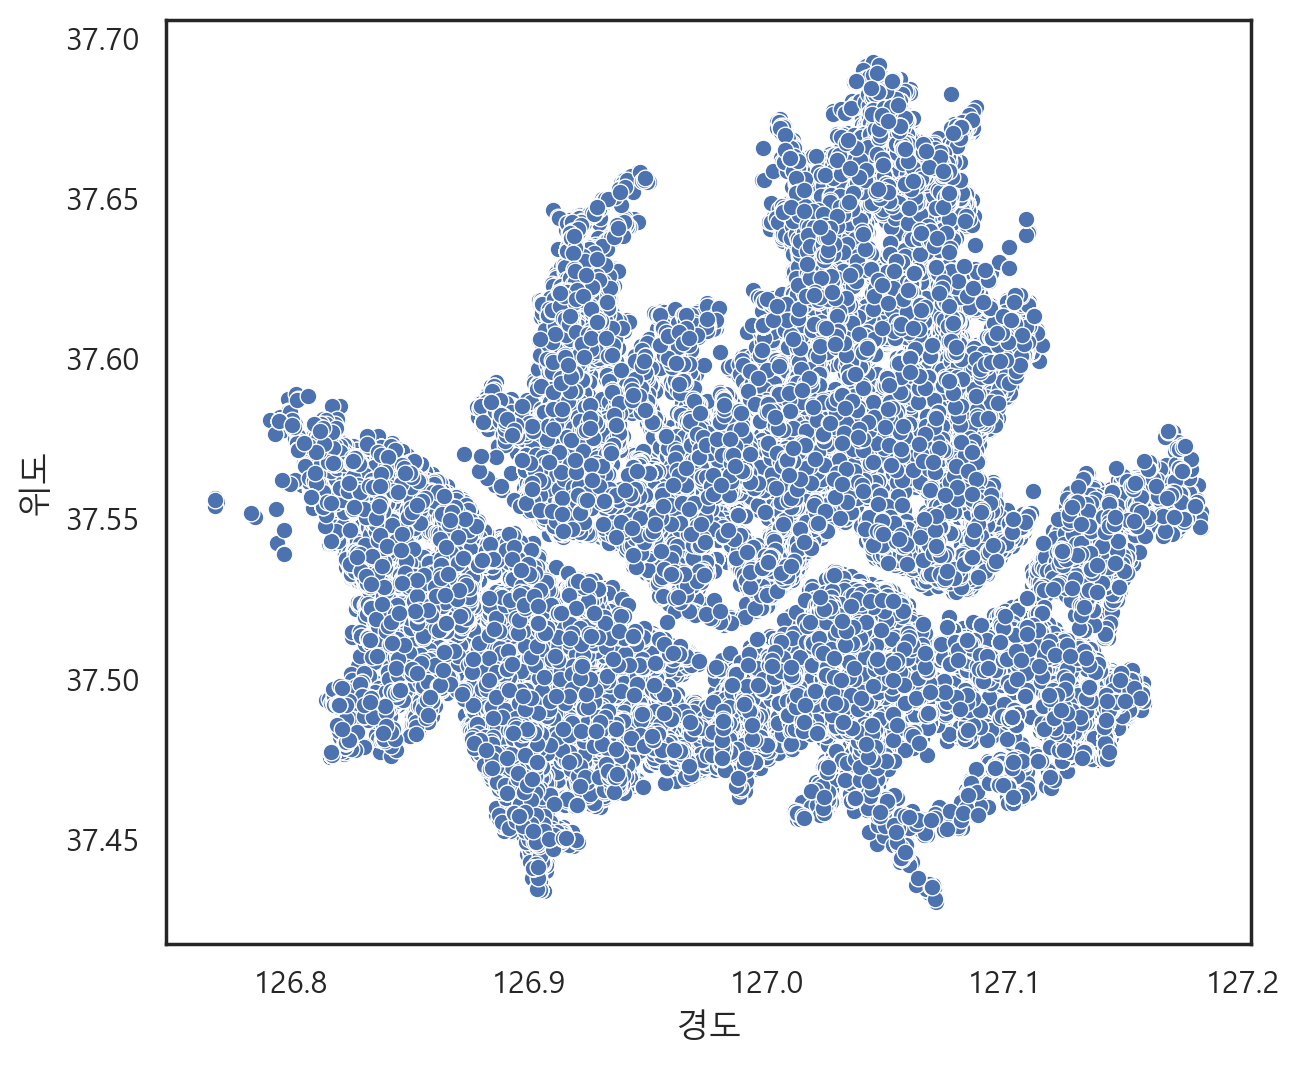

In [159]:
plt.figure(figsize=(7,6))
sns.scatterplot(df_seoul, x='경도', y='위도', palette = 'Set1')

In [155]:
df_seoul=df[df['시도명']=='서울특별시']